In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# 2019 day 8

In [2]:
INPUT = """112222222222222212222122220212222222202222222222222122222222202100222222120222101222222122222222221222220102222222222020222222212221222222222222221222102222222222222212222222220222222222202222222222222122222222222100222222120222121222222122222222221222221002222222222222222222202221222222222222222222022222222222222212222222220222222222202222222222222222222222222201222222120222010222222022222222221222220012222222222021222222212222222222222222221222112222222222222222222022222212222222222222222222222022222222202000222222021222021222222222222222221222220202222222222222222222202221222222222222222222212222222222222202222222222222222222222222222222222222222222212021222222021222001222222222222222222222222122222222222222222222222221222222222222221222222222222222222202222122222222222222202222212222222122222202212110222222222222220222222022222222220222221012222222222020222222222221222222222222220222022222222222222202222222221222222222222222212222202122222202202012222222222222220222222122222222222222222122222222222220222222222222222222222212220222112222222222222222222122221212222222222222202222212222222222222111222222121222121222222122222222220222222100222222222221222222212221222222222222221222022222222222222212222022222212222222212222202222222222222212122011222222222222002222222122222222222222220012222222222021222222222220222222222222220222022222222222220212222022222202222222202222212222201122222202222212222222222222102222222222222222222222222212222222222222222222212220222222222202221222002222222222222222222022220212222222212222212222220122222212022201222222121222100222222122222222220222222122222222222122222222202222222222222212222222002222222222222222222122222212222222222222222222222222222222102110222222221222101222222222222222220222221212222222222021222222202222222222222222221222202220222222220212222222222222222222212222202222211022222202022221222222222222001222222122222222021222220012222222222122222222212221222222222222222222212222222222221202222022221222222222222222212222200222222212012101222222021222200222222022222222120222222210222222222021222222212222222222222222220222002222222222221212222222220212222222202222222222212222222222202202222222221222100222222022222222220222222000222222222121222222212220222222222212221222112220222222221222222222222222222222212222212222222122222212122212212222221222010222222022222222022222222002222222222120222222202222222222222202222222222222222222221222222022221222222222212222202222212122222222122201212222120222101222222222222222222222221212222222222120222222222220222222222202220222022221222222222212222122220222222222212222212222212022222202222012222222120222000222222222222222121222222221222022222220222222222222222222222202221222002221222222222222222122222212222222202222012222211222222212112111212222122222020222222022222222022222221011222122222220222222212221222220222211221222112222222222221222222122221222222222222222102222211222222212002101202222020222111222222222022222122222222022222222222122222222222222222220222220222222202222222222220222222122221212222222202222222222222022222222202200222221021222220222221222122222122222221011222022222222222222202220222220222201222222112222222222221202222122222222222222222222012222210122222212012000202222121222011222221022220222020222220002222122222222222222222220222222222202020222002220222222222222222122221022222222202222222222220122222212102201222221022222221222221022022222222222220100202222222220222222202220222221202201221222022221222222220222222022220002222222202222202222210222222202022101202222220222120222221220021222021222221000212122222220222222212222222220222211122222002222222222220202222222221212222222222222102222221222222212002001202222021222011222220021121222222222220201212122222021222222212220222222222221220220022220222222221212222122222222222222222222102222222022222202112000222021022222011222222121220222121222220101222022222122222222212221222222212212122222022220222222121222222222220202222222222222012222210222222212222120222220221222222222221121121222220222220022212222222222222222222220222220202220020222202221212222020222222222221022222222212222112222202022222212212021202222021222202222220122221222120222220020112122222022222222200222222222222210120222022222202222021212222022222002202222222222222222221122222202112201212221020222200220221020120222022222220012212022222120222222212222222222212211122222012222212222020222222122221002212222212222102222222222222210002010212221221222211222221220121222222222220211102122222022222222220221222221222220122221222221212222022202222122222122222222202222012222211022222202222110222121122222112221221222222222121222220202122022222022222222220220222222212200020221202220222222221202222222220202222222222222022222211122222222222120212022221222120222222221120222122222222100222022222021222222201222222220222220220222022222212222120211222122220222212222202222222222202222222212212221202221221222021221220021220222022222222002112122222021222222211220222221222200122222212021202222122200222122220022202222202222222222211222222200122122212122220222112221220122122222120222222222102022222122202222220221222221202202220222102222212222022200222112220222212222212222212222220022222212012020202121120222212221222020220222120222221101122222222022212222210220222221202211222220022021202222222220222120222222202222202222012222210222222210212021212021120222102220222222220222120222221000122122222220202222222020222222212222021222112022212222221202222021222102220222212222022222221022222222202102212021121222101222222120021222122222222212122122222021202222210022222222222212220222112021202222122201222101222212202222202222102222211022222210012010212120222222121221222121021222022222222002112022222222212202200222222222222210222220012121212222120202222012221102212222201222212222212122222220122101212221222222212222222020222222122222221122212022222121212222211221222222222220120222222220222222120221222200221112211222212222112222211122222220222010222121220222211220220120021222022222220021222222222020212212210221222221202222122222012220202222221211222212220202211222201222112222212122222202112222222121122222220222222120120222021222222001212122222021212212200121222221212200022222222020202222020222222100220112221222200222022222221222222200012010212221120222200222222220121222221222222211022222222222202222221122222221212210221220222120212222121200222100220202211222200222022122212122222222122100212121120122212221221021122222020222222102202222222022202222210121222220212200220222122221222222222200222110222012201222222222002022211122222211222001222021022122101220220221120222021222222200112122222020212212210020222220222212122221222220202222020212222010221122202222220222022222220022222221122221212120021122222221222220020222021222220010012222222022202212221121222220222201122220212221212222020211122202220112200222201222112022201222222202102022212021020122021222220222221222021222221000102022222120212222220021222221222222121220102022202222020202222000220002211222221222002022220022222201022112222122121222102220221120121222120222221201212122222222212202220022222222221200022222222222222222022212122211221112222222222222012022222222222220122120212122021022202220222220220222122222222210212122222122212222212021222200220201021222202120222222022221222212220222210222212222202122211222222212002001202022222022200220220222120222021222221222002122222122212222221221222221201211221221012220222221220200122212212102210222210222212122221122222212122101212122022022211221221122122222222222222200012102222020212212221221222202210211221221022021202220022220222101202222211222221222002122211222222202122100212221122022001220222122221222121222221020212002222122222212202222222201222210221220001221212221022221222201211222211222202222122222211222222222122202212121121122010220221222121222021222220201012212222220212212211220222211212202220222221022202222220220122101202022221222221222122222201022222200002202212220021222000222222021220222102222222202202102222120222212211222222201211210021222211120222221021221122120220222220222210222012222201022222221202121222020122122201220021120221222211222220122212122222220212222201221222210200211220222111020212221222211122000220002210222212222202002201222222201222202222222020222011221021120222222211222221120002222222022202222210222222201210201122220001222222221020202122020202022212222201202002012202222222200002101212122121222012220022022120222120222220110102002222122212202211022222220210200220221222121222222220212122020212112220222221212102102212022222210212221202122221022021220021021221222010222222011102222222221202212212020222222202201221221211222202221020201022120202102201222210212202222212122222201222011212121222122201222120220220222121222221210002112222220222202222022222211212221121222101121222222120200222202201012222222201212002012210222222221002111202021221122000222220020121222020222220122202022222020222212211121122211222222220222020220202221120221222111212022221222201212112122222022222221022100222122122122222222122022220222222222220002202212222222212202221222022210221222022220212121222222022222122201222122212222202202212202221122222211102112202222020022002222121221022022200220221020011202222121212212200121122200210202222222111220222220222200022112212002211222200222122202211022222212120211222221220022020220022221021222011222221120011002222021212212222222222210220221121221020222212221022220122000202102201222221212002122212122222001012121202122222022001222220022121022201222020200212112222020202222210021122212212210221222000221222221222202022122200222200222221222222212220222222200000012212120021122210222020120221222202221021000022102222220212112201122022222202201022222211222212222221222122221212112222222220212112212212022222112212011222122220122120222221220022022110221020111000112222120202222202021022221202200022220000220222220222221122122222002222222212212022112221122222201112210212220122222212222020222112222022221122122010222222120222012220121122211212200122220212222202220020202022210212022210222201222222122222022222011002011202120222122211221221222211102101221121202220102222122212212221222122210200202220221010122210220020201022020212122202222212202222212222222222001022201212022020222102220021122201221011221222212010002222220202002200021222201210221121220110221210221020211222012202102201222200212102212222122222212221001202021022122211222020122111221110220021212222012222221212212210020222212201200122221200222211222120212122122201222210222202222222002202222222222001222222121221022020222221022121021110220122211000122222121222011211022222221221111020222011120220220020221022020222212212222222212002212200022222221002221212220021022021222220022222000200222020100202002222200212002200220022220202201220222222021222220221210122101222102220222202212212102201122222002020012222022222202012221221222122121120221021112221212212001222000211220022222212002121220010121212220220201222020220012212222210222102022221022222221101021212021021122122222121222222101101222120110110112212010102111220222222202212011020222212222111222221210122020221212220222211202110022221222222102011120212120020102120221222222111121220222120011112002202010122212222220222201200112021200112121120220020201022110200002202222211222200022220122222200220111212021122012012221221222000211012221021201122212222022022012212022022200202012222212201022210221220211022102210112212222220222200012201222222011120101212022121022002220122121212122002221122101110202212110112012210122022201212210112212110121221222021212022200201102200222211202200022220222222000210201202020021010002222020021201101220220122201220202222102102021212120122211201001112212020122110221022220122122220012212222211202200212212022222022202222222121221202122221220222011000012222221212020212202222212202200221022201221111000200000220002220200210122221222012202222211212000202222222222021201101202122122020222220120221112200121210020210101122212201012021210221122200211102212200012020200220220222022111212202211222222222222212202122222111202022222222121021111220220120001220120222021211200002222000022000202221222210210220101220102021110220112200221122210212212222220222012112220122222112020110222220121121211202020022111000100211022112020212212121102022212222122202222220201212002022012222002202020010222212212202202202222212212022222010210101202122020002101222022122202022121222120220100102212120012020220020222201201000211211120120112222202212222021021112220202202202120022212022222021111220202222022222121201022120201010212211122121202002212121222222222022022202221021010201111201200220112201122220010222210222202222102012222222222112020002222020121220221221021221211212021202121021100022212020212210212122122201220120000211202201121222101222220202122002210222210202221222202222222221210001212022120221222211020022022001002220220222000012202021002020200222022210221011220200101202012220220202221201020122220222222202202112220222222102121221212122021100121210020122112201210220021120012002202101002002220220222212201022100221122220011210011222021020201022211222200212121112200022022002210100212222022122000200021120110212011200220001020202212022122122202220222211002022220200122020122200001212021200110202212222212212001212222022222000200101222010221210201211021022111100001221120221201212212222202211220121022221001121111221222212011200110202120121001202200212222202212202212122022100010012222211121110001202022222120022020221222002202002222011102212200220022210111202010210122212200211000102021001010202220222202202100222220122022100112200212211122012202011020220102021210202020221000222202020212201210022122202012211212211010011200211002020122110021022202202222222211112211222222000102010222222221112210211122122022112122222020001002212222101102221201021222210201010220221011022102202110221221022010222222222221212022102221222022120111002202210022121121100221121221000120212022212121112212220112010212222222211020222010202112201010212110001220102211222220222210202210112221122212201222200212112221120220212020221201100210210120111020112212100112201211020122222020211220200002101012201211122221022201012201202212222102112221022102021100112212201021102002011222120220200200202022110012122202000212202220221122211020011012210022000121200121200122202011212220212212212222222202022022000220022212102221100111101221120002111210000122201220212202100002202202022022201110201021222110120202222000012021211021122212221220202201022201122122001201022212210220121002000020121212020022021221222111012202210102211201121022210002120001220212020012210020222021120121222220221201222102002202222022000201001222122220222210010222022102200120202220002201102212001112012210200022220101122102202111121121210100220221020012212200210212202111212201022012201010020202201020202110002122220211200202212021001110022202001022022220201122212012010111210101002020222011112222111210122200220012220220002210222222001012120222112121012001112021121202212121112121012112112212210002010210222222202111200210211202121012002102000101211111010100120221012202200121110120121110120020121100021222100011001001200112000212100001000010102120220120002000122100001220102"""

inp = list(map(int, list(INPUT)))
# dimensions = 25 by 6
layers = [inp[i:i+25*6] for i in range(0, len(inp), 25*6)]
# locate the layer that contains the least number of 0s
nb_zeros = [(layer.count(0),layers.index(layer)) for layer in layers]
chosen_layer_index = sorted(nb_zeros)[0][1]
# answer Eric's question to part 1
#print(layers[chosen_layer_index].count(1) * layers[chosen_layer_index].count(2))

# part 2
message = ''

for i in range(len(layers[0])): # msg char number
    for layer in layers: # iterate over layers
        if layer[i] != 2:
            message += str(layer[i])
            break
        
assert len(message) == 25*6
print(message)

111000110011100111101110010010100101001000010100101110010000100100010011100100101000011100010001001010010100101000010000100101110001100100001111011100


In [6]:
img = list(map(int, message))
#img = [img[k:k+25] for k in range(6)]
img = np.array(img).reshape((6,25))
img.shape

(6, 25)

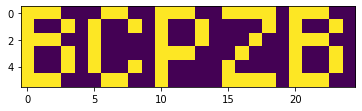

In [8]:
plt.imshow(img);

Found the message!

# 2018 day 10

In [5]:
INPUT = '''position=<-40181, -50237> velocity=< 4,  5>
position=<-40122,  30405> velocity=< 4, -3>
position=<-40158, -50246> velocity=< 4,  5>
position=<-50220,  50573> velocity=< 5, -5>
position=< 20317, -30082> velocity=<-2,  3>
position=<-50207,  40490> velocity=< 5, -4>
position=< 10260,  -9913> velocity=<-1,  1>
position=<-50212, -20003> velocity=< 5,  2>
position=< 40498, -40158> velocity=<-4,  4>
position=< 30446,  20330> velocity=<-3, -2>
position=< 10255, -50241> velocity=<-1,  5>
position=< 10263, -40158> velocity=<-1,  4>
position=<-40178,  40492> velocity=< 4, -4>
position=< 40487,  30411> velocity=<-4, -3>
position=<-19978,  30411> velocity=< 2, -3>
position=<-50215, -40162> velocity=< 5,  4>
position=< 40474, -30078> velocity=<-4,  3>
position=< 20309,  10241> velocity=<-2, -1>
position=<-50235,  40484> velocity=< 5, -4>
position=< 10259, -50246> velocity=<-1,  5>
position=< 10228,  10248> velocity=<-1, -1>
position=<-19970,  40487> velocity=< 2, -4>
position=<-30093, -50246> velocity=< 3,  5>
position=< -9929,  -9918> velocity=< 1,  1>
position=< 20307, -50246> velocity=<-2,  5>
position=< 30417, -19994> velocity=<-3,  2>
position=< 10279,  40491> velocity=<-1, -4>
position=<-30089, -19997> velocity=< 3,  2>
position=<-40132,  -9922> velocity=< 4,  1>
position=<-40132,  10244> velocity=< 4, -1>
position=< 10234, -50246> velocity=<-1,  5>
position=< 10247,  50569> velocity=<-1, -5>
position=<-20012,  50572> velocity=< 2, -5>
position=< 20348, -50243> velocity=<-2,  5>
position=< 40506,  -9922> velocity=<-4,  1>
position=<-30067,  30411> velocity=< 3, -3>
position=< -9928,  30402> velocity=< 1, -3>
position=< 40490,  40492> velocity=<-4, -4>
position=<-50247, -40156> velocity=< 5,  4>
position=<-40182, -40158> velocity=< 4,  4>
position=< 10282,  40492> velocity=<-1, -4>
position=<-40169, -50245> velocity=< 4,  5>
position=< 30436,  10244> velocity=<-3, -1>
position=<-30042,  30406> velocity=< 3, -3>
position=< 10236, -50244> velocity=<-1,  5>
position=< 40523, -50246> velocity=<-4,  5>
position=<-30101,  -9916> velocity=< 3,  1>
position=< 50571, -50238> velocity=<-5,  5>
position=<-19980, -40157> velocity=< 2,  4>
position=<-30092,  30406> velocity=< 3, -3>
position=<-20009,  10244> velocity=< 2, -1>
position=< 30433,  30411> velocity=<-3, -3>
position=< 40514, -50242> velocity=<-4,  5>
position=< 40479, -30075> velocity=<-4,  3>
position=<-20020,  50566> velocity=< 2, -5>
position=< 20309, -30076> velocity=<-2,  3>
position=<-50237,  20324> velocity=< 5, -2>
position=< 20341, -40165> velocity=<-2,  4>
position=< -9919,  30409> velocity=< 1, -3>
position=< 50555,  30405> velocity=<-5, -3>
position=<-50205,  30402> velocity=< 5, -3>
position=< 20365,  40485> velocity=<-2, -4>
position=< -9939,  30407> velocity=< 1, -3>
position=< 30406,  30410> velocity=<-3, -3>
position=< 40527,  30411> velocity=<-4, -3>
position=< 20339, -40156> velocity=<-2,  4>
position=<-20012,  -9922> velocity=< 2,  1>
position=<-30049,  30406> velocity=< 3, -3>
position=<-20020,  30407> velocity=< 2, -3>
position=< 20330, -50240> velocity=<-2,  5>
position=< 20338,  40487> velocity=<-2, -4>
position=< 40526,  50567> velocity=<-4, -5>
position=<-30040, -50244> velocity=< 3,  5>
position=<-40148, -19999> velocity=< 4,  2>
position=< 20325,  -9922> velocity=<-2,  1>
position=< 20305,  30411> velocity=<-2, -3>
position=<-20020,  30409> velocity=< 2, -3>
position=< -9931,  50566> velocity=< 1, -5>
position=< 50582,  50564> velocity=<-5, -5>
position=<-50259, -30084> velocity=< 5,  3>
position=<-19985,  50564> velocity=< 2, -5>
position=< 10256, -19999> velocity=<-1,  2>
position=< -9918, -19995> velocity=< 1,  2>
position=< 20349,  20330> velocity=<-2, -2>
position=< 50592, -50246> velocity=<-5,  5>
position=<-30093,  40485> velocity=< 3, -4>
position=< -9894,  50565> velocity=< 1, -5>
position=< 30418, -19999> velocity=<-3,  2>
position=<-30065,  10249> velocity=< 3, -1>
position=<-40123,  40492> velocity=< 4, -4>
position=<-40150,  40489> velocity=< 4, -4>
position=<-40182,  20329> velocity=< 4, -2>
position=<-19977,  -9918> velocity=< 2,  1>
position=< 30388,  30411> velocity=<-3, -3>
position=< 30393,  10245> velocity=<-3, -1>
position=< 40471,  -9914> velocity=<-4,  1>
position=<-40122,  10240> velocity=< 4, -1>
position=< 40524, -40156> velocity=<-4,  4>
position=< -9923,  40484> velocity=< 1, -4>
position=<-30073,  40491> velocity=< 3, -4>
position=< 50590,  40483> velocity=<-5, -4>
position=< 10255, -40159> velocity=<-1,  4>
position=< 10241, -30079> velocity=<-1,  3>
position=< 20364, -40156> velocity=<-2,  4>
position=<-40133,  -9922> velocity=< 4,  1>
position=< -9897,  40483> velocity=< 1, -4>
position=<-50247,  30411> velocity=< 5, -3>
position=< 10227,  -9922> velocity=<-1,  1>
position=< 30421, -30080> velocity=<-3,  3>
position=<-50239,  10244> velocity=< 5, -1>
position=<-30077, -19998> velocity=< 3,  2>
position=<-19994, -19997> velocity=< 2,  2>
position=<-30091,  20321> velocity=< 3, -2>
position=<-50239,  -9915> velocity=< 5,  1>
position=<-50239, -50238> velocity=< 5,  5>
position=<-50254,  50568> velocity=< 5, -5>
position=< 20312,  30410> velocity=<-2, -3>
position=< 10258,  30411> velocity=<-1, -3>
position=<-30061,  50573> velocity=< 3, -5>
position=< -9928,  10245> velocity=< 1, -1>
position=< 10271, -30080> velocity=<-1,  3>
position=<-19972,  10247> velocity=< 2, -1>
position=< 40493,  50566> velocity=<-4, -5>
position=<-30096, -30083> velocity=< 3,  3>
position=< 20332,  -9921> velocity=<-2,  1>
position=< 20357, -30081> velocity=<-2,  3>
position=<-50263,  40486> velocity=< 5, -4>
position=< 10267, -50237> velocity=<-1,  5>
position=<-50239,  10242> velocity=< 5, -1>
position=< 50583,  20321> velocity=<-5, -2>
position=< 30425, -30076> velocity=<-3,  3>
position=<-50227,  30411> velocity=< 5, -3>
position=<-40125,  20330> velocity=< 4, -2>
position=<-20020, -40163> velocity=< 2,  4>
position=< 10268, -40163> velocity=<-1,  4>
position=<-40181,  20321> velocity=< 4, -2>
position=< 10231,  20330> velocity=<-1, -2>
position=<-30101,  20322> velocity=< 3, -2>
position=<-40157,  20326> velocity=< 4, -2>
position=< 30394,  10244> velocity=<-3, -1>
position=<-40125,  50564> velocity=< 4, -5>
position=< 40498,  20323> velocity=<-4, -2>
position=< 50563,  10248> velocity=<-5, -1>
position=<-30080,  50573> velocity=< 3, -5>
position=< -9896,  20321> velocity=< 1, -2>
position=<-50236,  50566> velocity=< 5, -5>
position=<-40142, -19994> velocity=< 4,  2>
position=< -9939,  -9916> velocity=< 1,  1>
position=<-40155,  -9915> velocity=< 4,  1>
position=< 20362,  20326> velocity=<-2, -2>
position=< 20347,  20325> velocity=<-2, -2>
position=< 30397, -19999> velocity=<-3,  2>
position=< 10235,  20327> velocity=<-1, -2>
position=<-50207, -30075> velocity=< 5,  3>
position=< 20333, -20003> velocity=<-2,  2>
position=< 40499,  40483> velocity=<-4, -4>
position=< 30385,  -9921> velocity=<-3,  1>
position=<-50210,  10242> velocity=< 5, -1>
position=<-40148,  50564> velocity=< 4, -5>
position=< 50582,  40483> velocity=<-5, -4>
position=<-30060, -30078> velocity=< 3,  3>
position=< 10271,  30406> velocity=<-1, -3>
position=< 50599, -40165> velocity=<-5,  4>
position=< 30401,  50565> velocity=<-3, -5>
position=< 20333, -50237> velocity=<-2,  5>
position=<-30053,  10249> velocity=< 3, -1>
position=< 20308, -50237> velocity=<-2,  5>
position=<-40163, -40161> velocity=< 4,  4>
position=< 40474, -50238> velocity=<-4,  5>
position=<-30053,  20321> velocity=< 3, -2>
position=<-30082, -50241> velocity=< 3,  5>
position=< 30429, -50246> velocity=<-3,  5>
position=< 30426,  20321> velocity=<-3, -2>
position=<-50250, -40157> velocity=< 5,  4>
position=< 40483, -50244> velocity=<-4,  5>
position=< 20320, -20003> velocity=<-2,  2>
position=< 40479, -40156> velocity=<-4,  4>
position=< 50568, -50238> velocity=<-5,  5>
position=< 50591, -30081> velocity=<-5,  3>
position=< 40526,  10240> velocity=<-4, -1>
position=< 50595,  20329> velocity=<-5, -2>
position=< 50592, -30075> velocity=<-5,  3>
position=<-30089,  50571> velocity=< 3, -5>
position=<-40169,  20330> velocity=< 4, -2>
position=<-20011,  30402> velocity=< 2, -3>
position=< 10265,  20330> velocity=<-1, -2>
position=<-19988, -20001> velocity=< 2,  2>
position=< 30397, -30077> velocity=<-3,  3>
position=< 50595,  30407> velocity=<-5, -3>
position=<-19972,  -9920> velocity=< 2,  1>
position=<-19978, -30084> velocity=< 2,  3>
position=< 30401,  10240> velocity=<-3, -1>
position=<-30042,  20325> velocity=< 3, -2>
position=< 10267,  40483> velocity=<-1, -4>
position=< -9939, -20001> velocity=< 1,  2>
position=< -9922, -30081> velocity=< 1,  3>
position=< 30393,  20321> velocity=<-3, -2>
position=< 10235, -30077> velocity=<-1,  3>
position=< 50607,  50564> velocity=<-5, -5>
position=<-40162, -20001> velocity=< 4,  2>
position=< 10271,  20326> velocity=<-1, -2>
position=< -9881, -40160> velocity=< 1,  4>
position=< 10247,  10246> velocity=<-1, -1>
position=<-20020, -30079> velocity=< 2,  3>
position=<-40123, -19994> velocity=< 4,  2>
position=< 30442, -40159> velocity=<-3,  4>
position=< 40483,  10246> velocity=<-4, -1>
position=< -9914, -30080> velocity=< 1,  3>
position=< 50572, -30079> velocity=<-5,  3>
position=< 30435, -30084> velocity=<-3,  3>
position=<-19995, -19999> velocity=< 2,  2>
position=<-30077,  -9916> velocity=< 3,  1>
position=<-19988,  40484> velocity=< 2, -4>
position=< 50555,  30403> velocity=<-5, -3>
position=< 50595,  30402> velocity=<-5, -3>
position=< -9878,  50564> velocity=< 1, -5>
position=< -9922, -50244> velocity=< 1,  5>
position=<-40141,  30402> velocity=< 4, -3>
position=< 30398, -50244> velocity=<-3,  5>
position=< -9904, -19999> velocity=< 1,  2>
position=<-50243,  40490> velocity=< 5, -4>
position=< 40490,  -9918> velocity=<-4,  1>
position=< -9907,  -9914> velocity=< 1,  1>
position=<-50242,  10249> velocity=< 5, -1>
position=<-40171,  20326> velocity=< 4, -2>
position=< 10247, -40164> velocity=<-1,  4>
position=<-30098, -30084> velocity=< 3,  3>
position=<-40155,  10242> velocity=< 4, -1>
position=< -9895,  10249> velocity=< 1, -1>
position=< 30442,  50573> velocity=<-3, -5>
position=<-19967,  50565> velocity=< 2, -5>
position=< 50559,  20321> velocity=<-5, -2>
position=< -9919, -30081> velocity=< 1,  3>
position=< -9905,  30406> velocity=< 1, -3>
position=< 50572,  -9917> velocity=<-5,  1>
position=< 10255,  10248> velocity=<-1, -1>
position=< -9938,  -9922> velocity=< 1,  1>
position=< 40483,  40486> velocity=<-4, -4>
position=<-50242,  40484> velocity=< 5, -4>
position=< 20352, -30083> velocity=<-2,  3>
position=< 30446,  40492> velocity=<-3, -4>
position=< -9936, -50237> velocity=< 1,  5>
position=< 50568, -20002> velocity=<-5,  2>
position=<-20016,  20330> velocity=< 2, -2>
position=< 50596, -20003> velocity=<-5,  2>
position=< 30425,  10240> velocity=<-3, -1>
position=< 50567, -30077> velocity=<-5,  3>
position=< 50606,  20325> velocity=<-5, -2>
position=< 50571, -20000> velocity=<-5,  2>
position=< 20337,  40492> velocity=<-2, -4>
position=< 40478,  -9918> velocity=<-4,  1>
position=<-30069,  20321> velocity=< 3, -2>
position=< 30401, -19994> velocity=<-3,  2>
position=< 50583, -50237> velocity=<-5,  5>
position=< 20317, -20002> velocity=<-2,  2>
position=< 10231,  -9915> velocity=<-1,  1>
position=< 20328,  30409> velocity=<-2, -3>
position=< 10233,  10244> velocity=<-1, -1>
position=<-19972,  50565> velocity=< 2, -5>
position=<-40134,  40491> velocity=< 4, -4>
position=< 40466,  50568> velocity=<-4, -5>
position=<-50215, -30079> velocity=< 5,  3>
position=< 10259,  20325> velocity=<-1, -2>
position=< -9939,  40484> velocity=< 1, -4>
position=<-50231,  50568> velocity=< 5, -5>
position=< 40467,  40492> velocity=<-4, -4>
position=< 10255, -30083> velocity=<-1,  3>
position=<-50222,  -9916> velocity=< 5,  1>
position=< -9927,  30408> velocity=< 1, -3>
position=< 20304,  20329> velocity=<-2, -2>
position=<-30057,  10249> velocity=< 3, -1>
position=< 20312,  20323> velocity=<-2, -2>
position=<-40182,  30405> velocity=< 4, -3>
position=<-30050, -40161> velocity=< 3,  4>
position=< 20317,  10243> velocity=<-2, -1>
position=<-50250,  -9919> velocity=< 5,  1>
position=<-30093,  50568> velocity=< 3, -5>
position=< 50555, -30080> velocity=<-5,  3>
position=< 50571,  -9915> velocity=<-5,  1>
position=< 40468,  30411> velocity=<-4, -3>
position=<-40180, -50237> velocity=< 4,  5>
position=< 10264,  -9913> velocity=<-1,  1>
position=< 50560, -50243> velocity=<-5,  5>
position=<-40170, -50242> velocity=< 4,  5>
position=< 20347,  10240> velocity=<-2, -1>
position=<-20018, -20003> velocity=< 2,  2>
position=< -9878,  20322> velocity=< 1, -2>
position=<-30069,  40486> velocity=< 3, -4>
position=<-50214,  10244> velocity=< 5, -1>
position=< 30427,  30407> velocity=<-3, -3>
position=< -9918,  -9922> velocity=< 1,  1>
position=< 40469,  10249> velocity=<-4, -1>
position=< 50575,  50572> velocity=<-5, -5>
position=< 50567,  50570> velocity=<-5, -5>
position=< 30427,  -9917> velocity=<-3,  1>
position=<-40162,  40485> velocity=< 4, -4>
position=<-19988,  40488> velocity=< 2, -4>
position=< -9890,  50568> velocity=< 1, -5>
position=<-30098,  20321> velocity=< 3, -2>
position=<-50207,  40483> velocity=< 5, -4>
position=< 40517,  50568> velocity=<-4, -5>
position=< 10275,  30402> velocity=<-1, -3>
position=< 50588,  10246> velocity=<-5, -1>
position=< -9883,  -9914> velocity=< 1,  1>
position=<-40166, -50238> velocity=< 4,  5>
position=< 10255, -40156> velocity=<-1,  4>
position=< 40524,  -9913> velocity=<-4,  1>
position=< 50551,  30402> velocity=<-5, -3>
position=<-30077, -20003> velocity=< 3,  2>
position=<-40182, -50243> velocity=< 4,  5>
position=<-30053, -19994> velocity=< 3,  2>
position=< 40506, -30084> velocity=<-4,  3>
position=<-50244,  -9918> velocity=< 5,  1>
position=< 30395,  20321> velocity=<-3, -2>
position=< 20338, -40156> velocity=<-2,  4>
position=<-30057,  50567> velocity=< 3, -5>
position=<-30100, -30084> velocity=< 3,  3>
position=<-20003,  50571> velocity=< 2, -5>
position=< 20328, -30075> velocity=<-2,  3>
position=< 20317,  -9921> velocity=<-2,  1>
position=< 20336, -40157> velocity=<-2,  4>
position=<-19988,  10246> velocity=< 2, -1>
position=<-40158,  50565> velocity=< 4, -5>
position=< 40506,  30410> velocity=<-4, -3>
position=<-19971,  -9918> velocity=< 2,  1>
position=< 50571, -19995> velocity=<-5,  2>
position=<-40131,  10240> velocity=< 4, -1>
position=<-30099, -19994> velocity=< 3,  2>
position=< 10223,  30409> velocity=<-1, -3>
position=< 20364, -50243> velocity=<-2,  5>
position=< 30393, -40162> velocity=<-3,  4>
position=< 40526,  40492> velocity=<-4, -4>
position=<-50239,  -9917> velocity=< 5,  1>
position=< -9907, -30077> velocity=< 1,  3>
position=< -9939,  40491> velocity=< 1, -4>
position=<-19964,  30410> velocity=< 2, -3>
position=< 50580, -19994> velocity=<-5,  2>
position=<-40164,  50568> velocity=< 4, -5>
position=<-30053, -40165> velocity=< 3,  4>
position=< 10240, -40158> velocity=<-1,  4>
position=< -9923,  50564> velocity=< 1, -5>
position=< 50605,  50564> velocity=<-5, -5>
position=< 30393, -40159> velocity=<-3,  4>
position=< -9939,  50568> velocity=< 1, -5>
position=<-40150,  50573> velocity=< 4, -5>
position=< 50566, -40161> velocity=<-5,  4>
position=<-19975,  -9913> velocity=< 2,  1>
position=<-40162,  40489> velocity=< 4, -4>
position=< -9913, -30081> velocity=< 1,  3>
position=< 10271, -50240> velocity=<-1,  5>
position=<-40164, -30079> velocity=< 4,  3>
position=< -9883, -40158> velocity=< 1,  4>
position=< 20355, -30084> velocity=<-2,  3>
position=< 40510,  -9922> velocity=<-4,  1>
position=<-30090,  20325> velocity=< 3, -2>
position=<-20003, -19996> velocity=< 2,  2>
position=<-30085,  20322> velocity=< 3, -2>
position=<-30099, -20003> velocity=< 3,  2>
position=< -9880,  -9922> velocity=< 1,  1>
position=< 50607, -19994> velocity=<-5,  2>
position=<-50207,  30402> velocity=< 5, -3>
'''

Notice how much the initial cooridntaes values are larger than the velocities, meaning it will take a looot of time to get those points moving significantly. So, as a first approximation, let us display not every second but every 1000 seconds 

In [6]:
inp = [row for row in INPUT.splitlines() if row]
pat = re.compile(r'(-?\d+).*?(-?\d+).*?(-?\d+).*?(-?\d+)')

x = [int(pat.search(row).group(1)) for row in inp]
y = [-int(pat.search(row).group(2)) for row in inp]
x_delta = [int(pat.search(row).group(3)) for row in inp]
y_delta = [-int(pat.search(row).group(4)) for row in inp]
l = len(inp)
xs, ys = [], []
# preparing the first ten minutes of data to make graphs
for i in range(6_00):
    xs.append([x[k] + x_delta[k]*i*1_000 for k in range(l)])
    ys.append([y[k] + y_delta[k]*i*1_000 for k in range(l)])


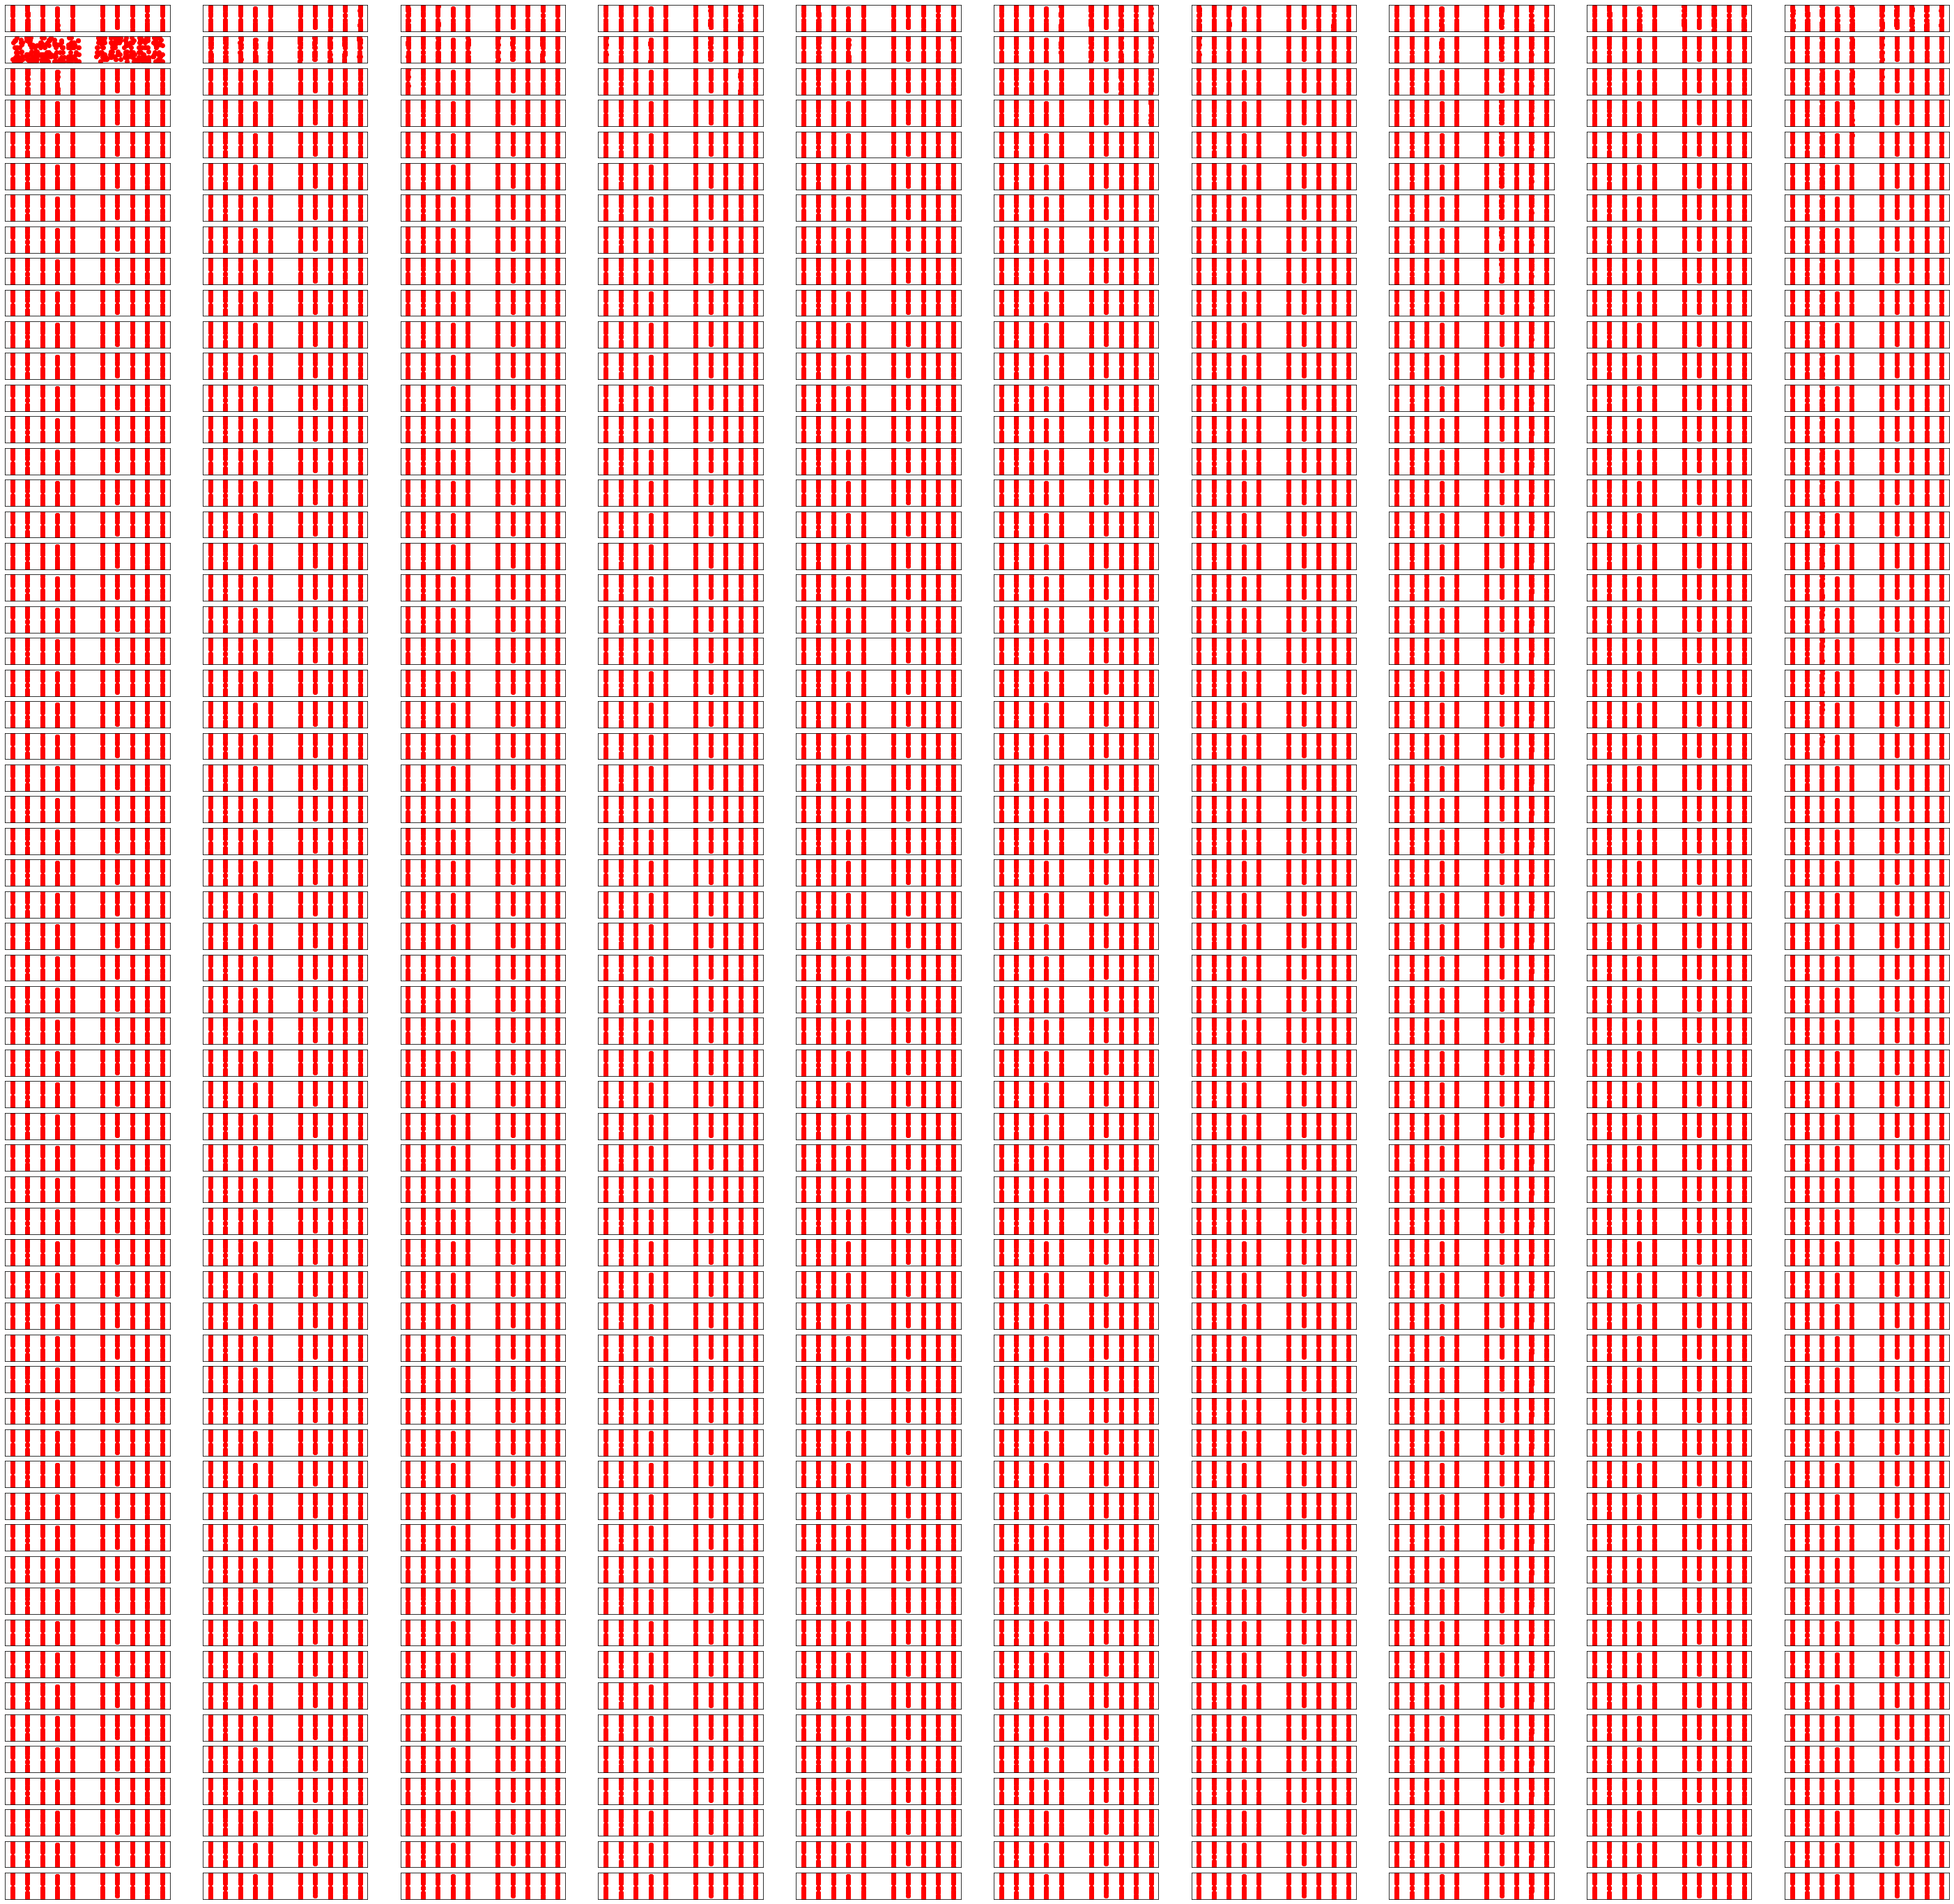

In [7]:
f, axarr = plt.subplots(60,10, figsize=(50,50))
for i in range(6_00):
    subplot = axarr[i // 10, i % 10]
    subplot.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    subplot.scatter(xs[i],ys[i],c='r')

It seems that something's happening around 10000 seconds. let us check that window

In [16]:
xs, ys = [], []
# preparing the detailed window of data to make graphs
for i in range(9500, 10500, 10):
    xs.append([x[k] + x_delta[k]*i for k in range(l)])
    ys.append([y[k] + y_delta[k]*i for k in range(l)])


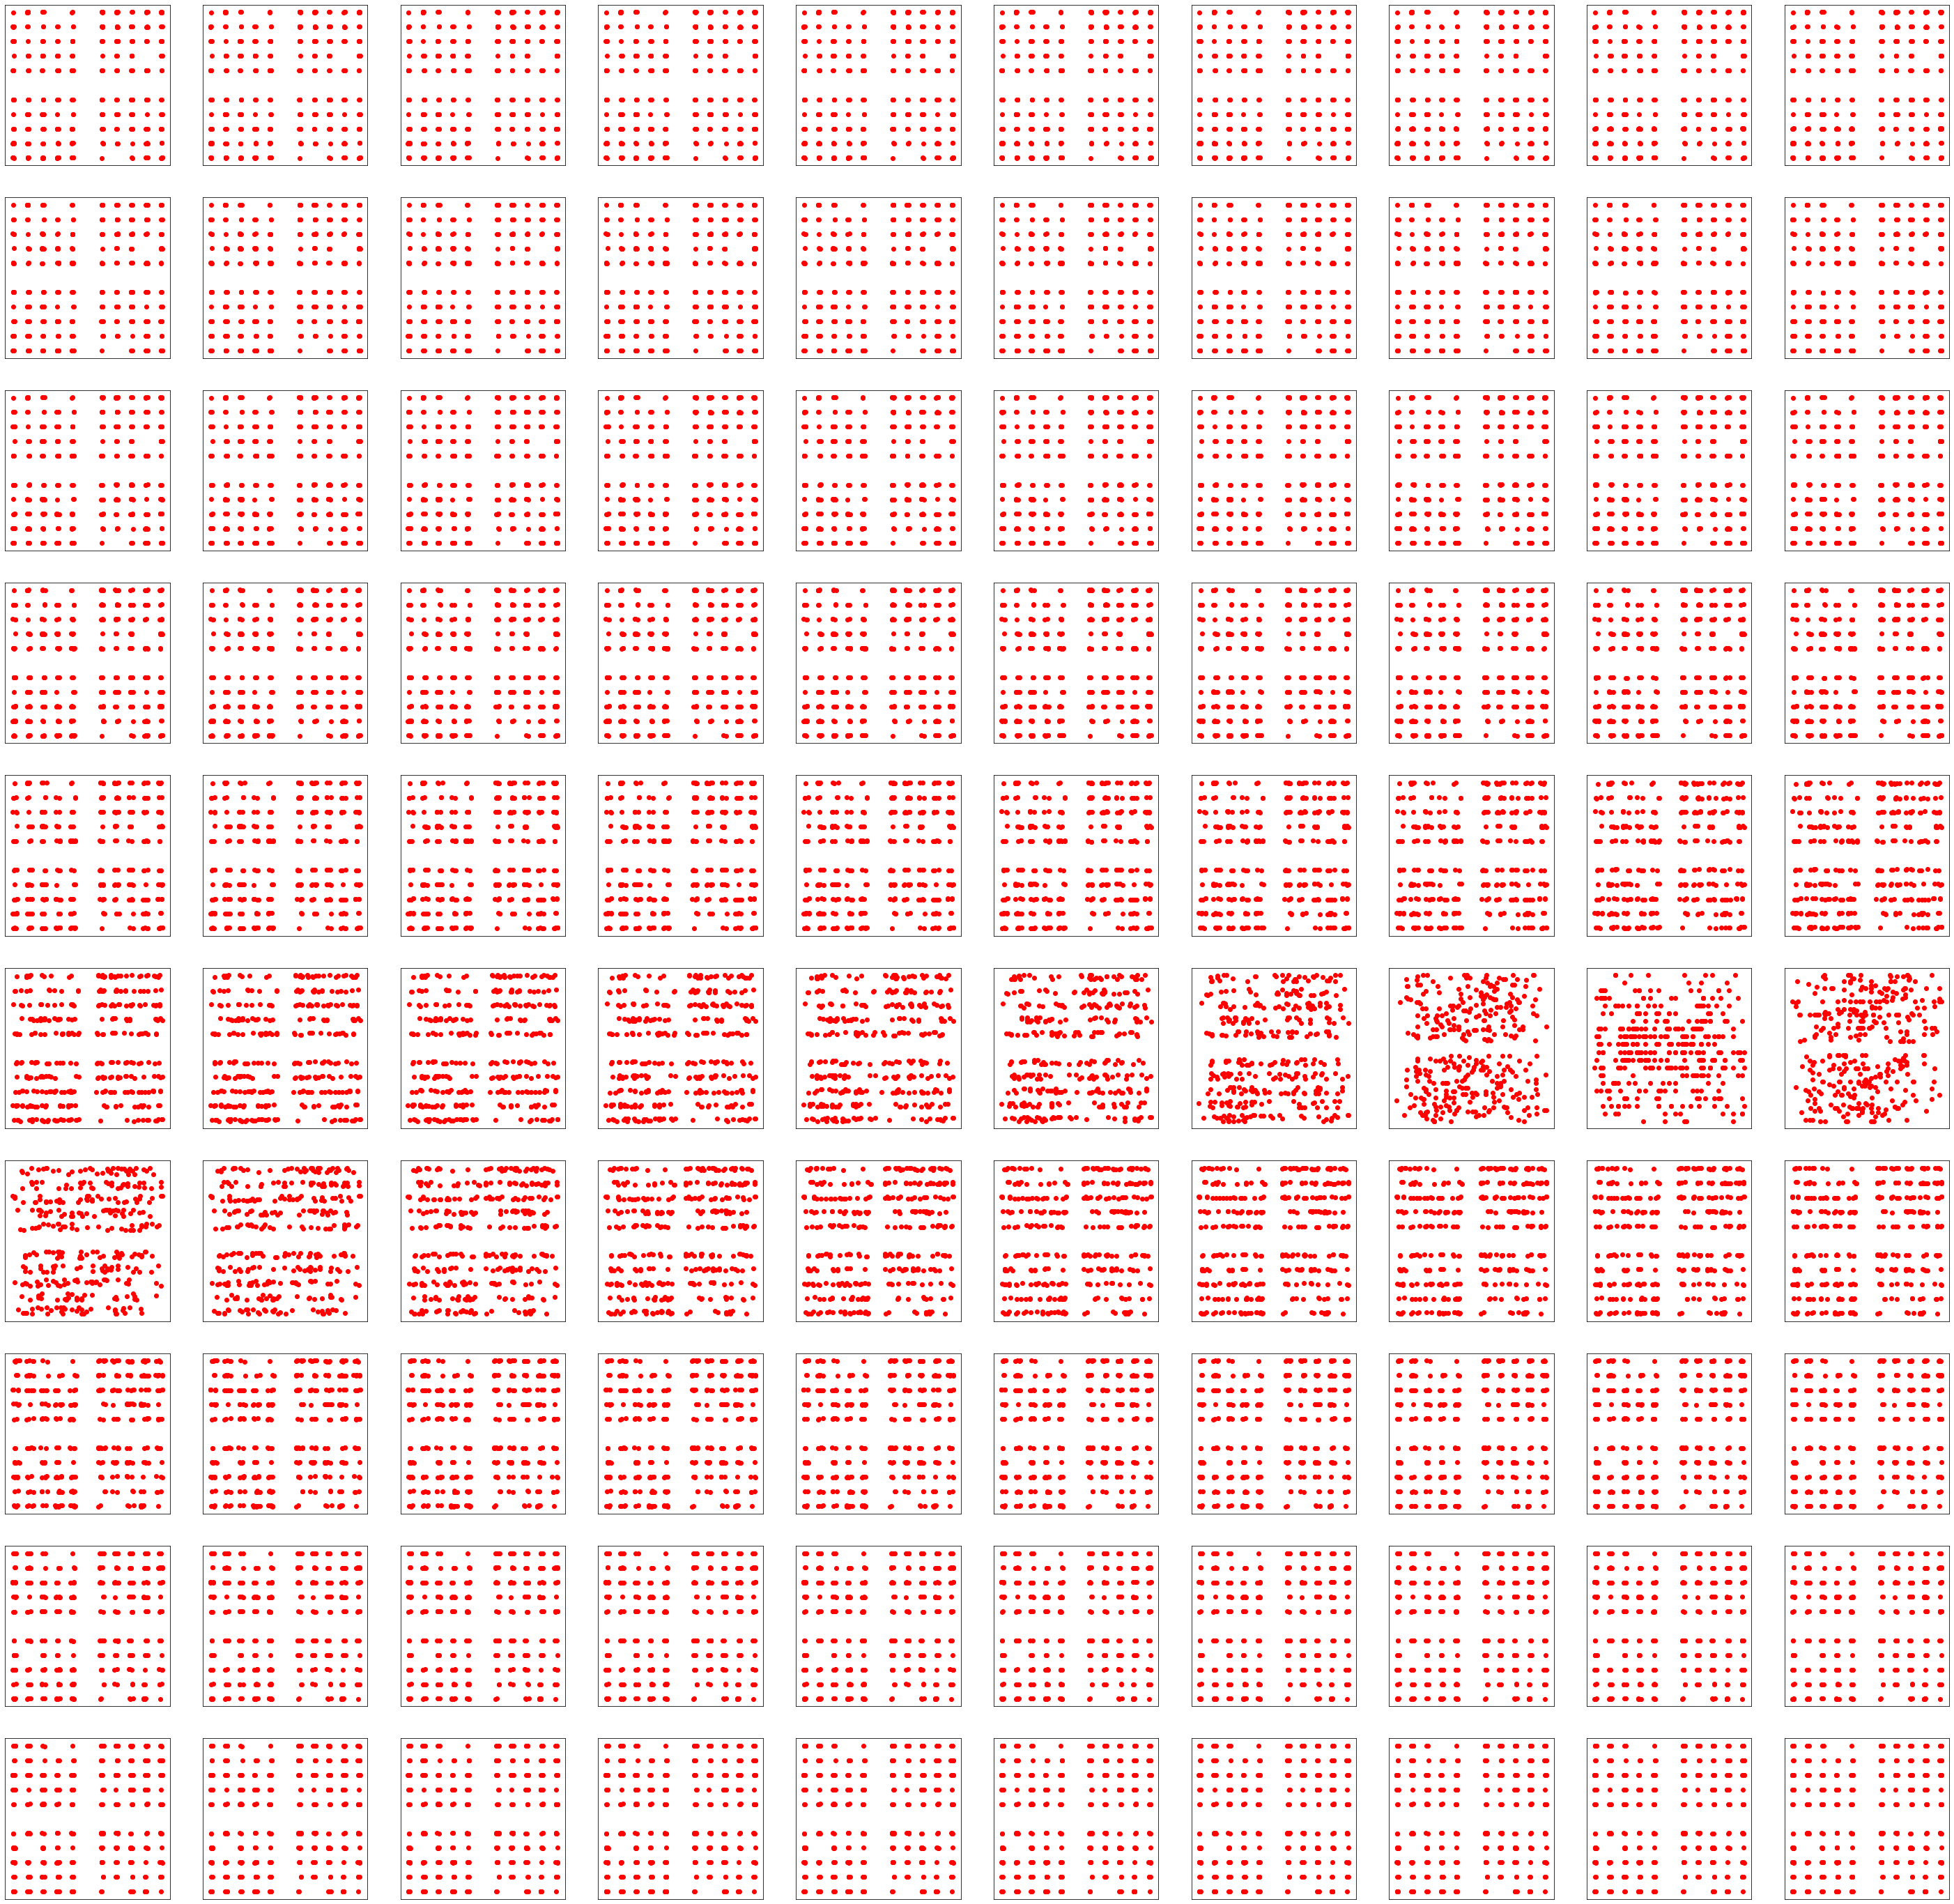

In [17]:
f, axarr = plt.subplots(10,10, figsize=(50,50))
for i in range(1_00):
    subplot = axarr[i // 10, i % 10]
    subplot.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    subplot.scatter(xs[i],ys[i],c='r')

let's zoom in on graphs 50 to 70

In [18]:
xs, ys = [], []
# preparing the detailed window of data to make graphs
for i in range(10_000, 10200):
    xs.append([x[k] + x_delta[k]*i for k in range(l)])
    ys.append([y[k] + y_delta[k]*i for k in range(l)])


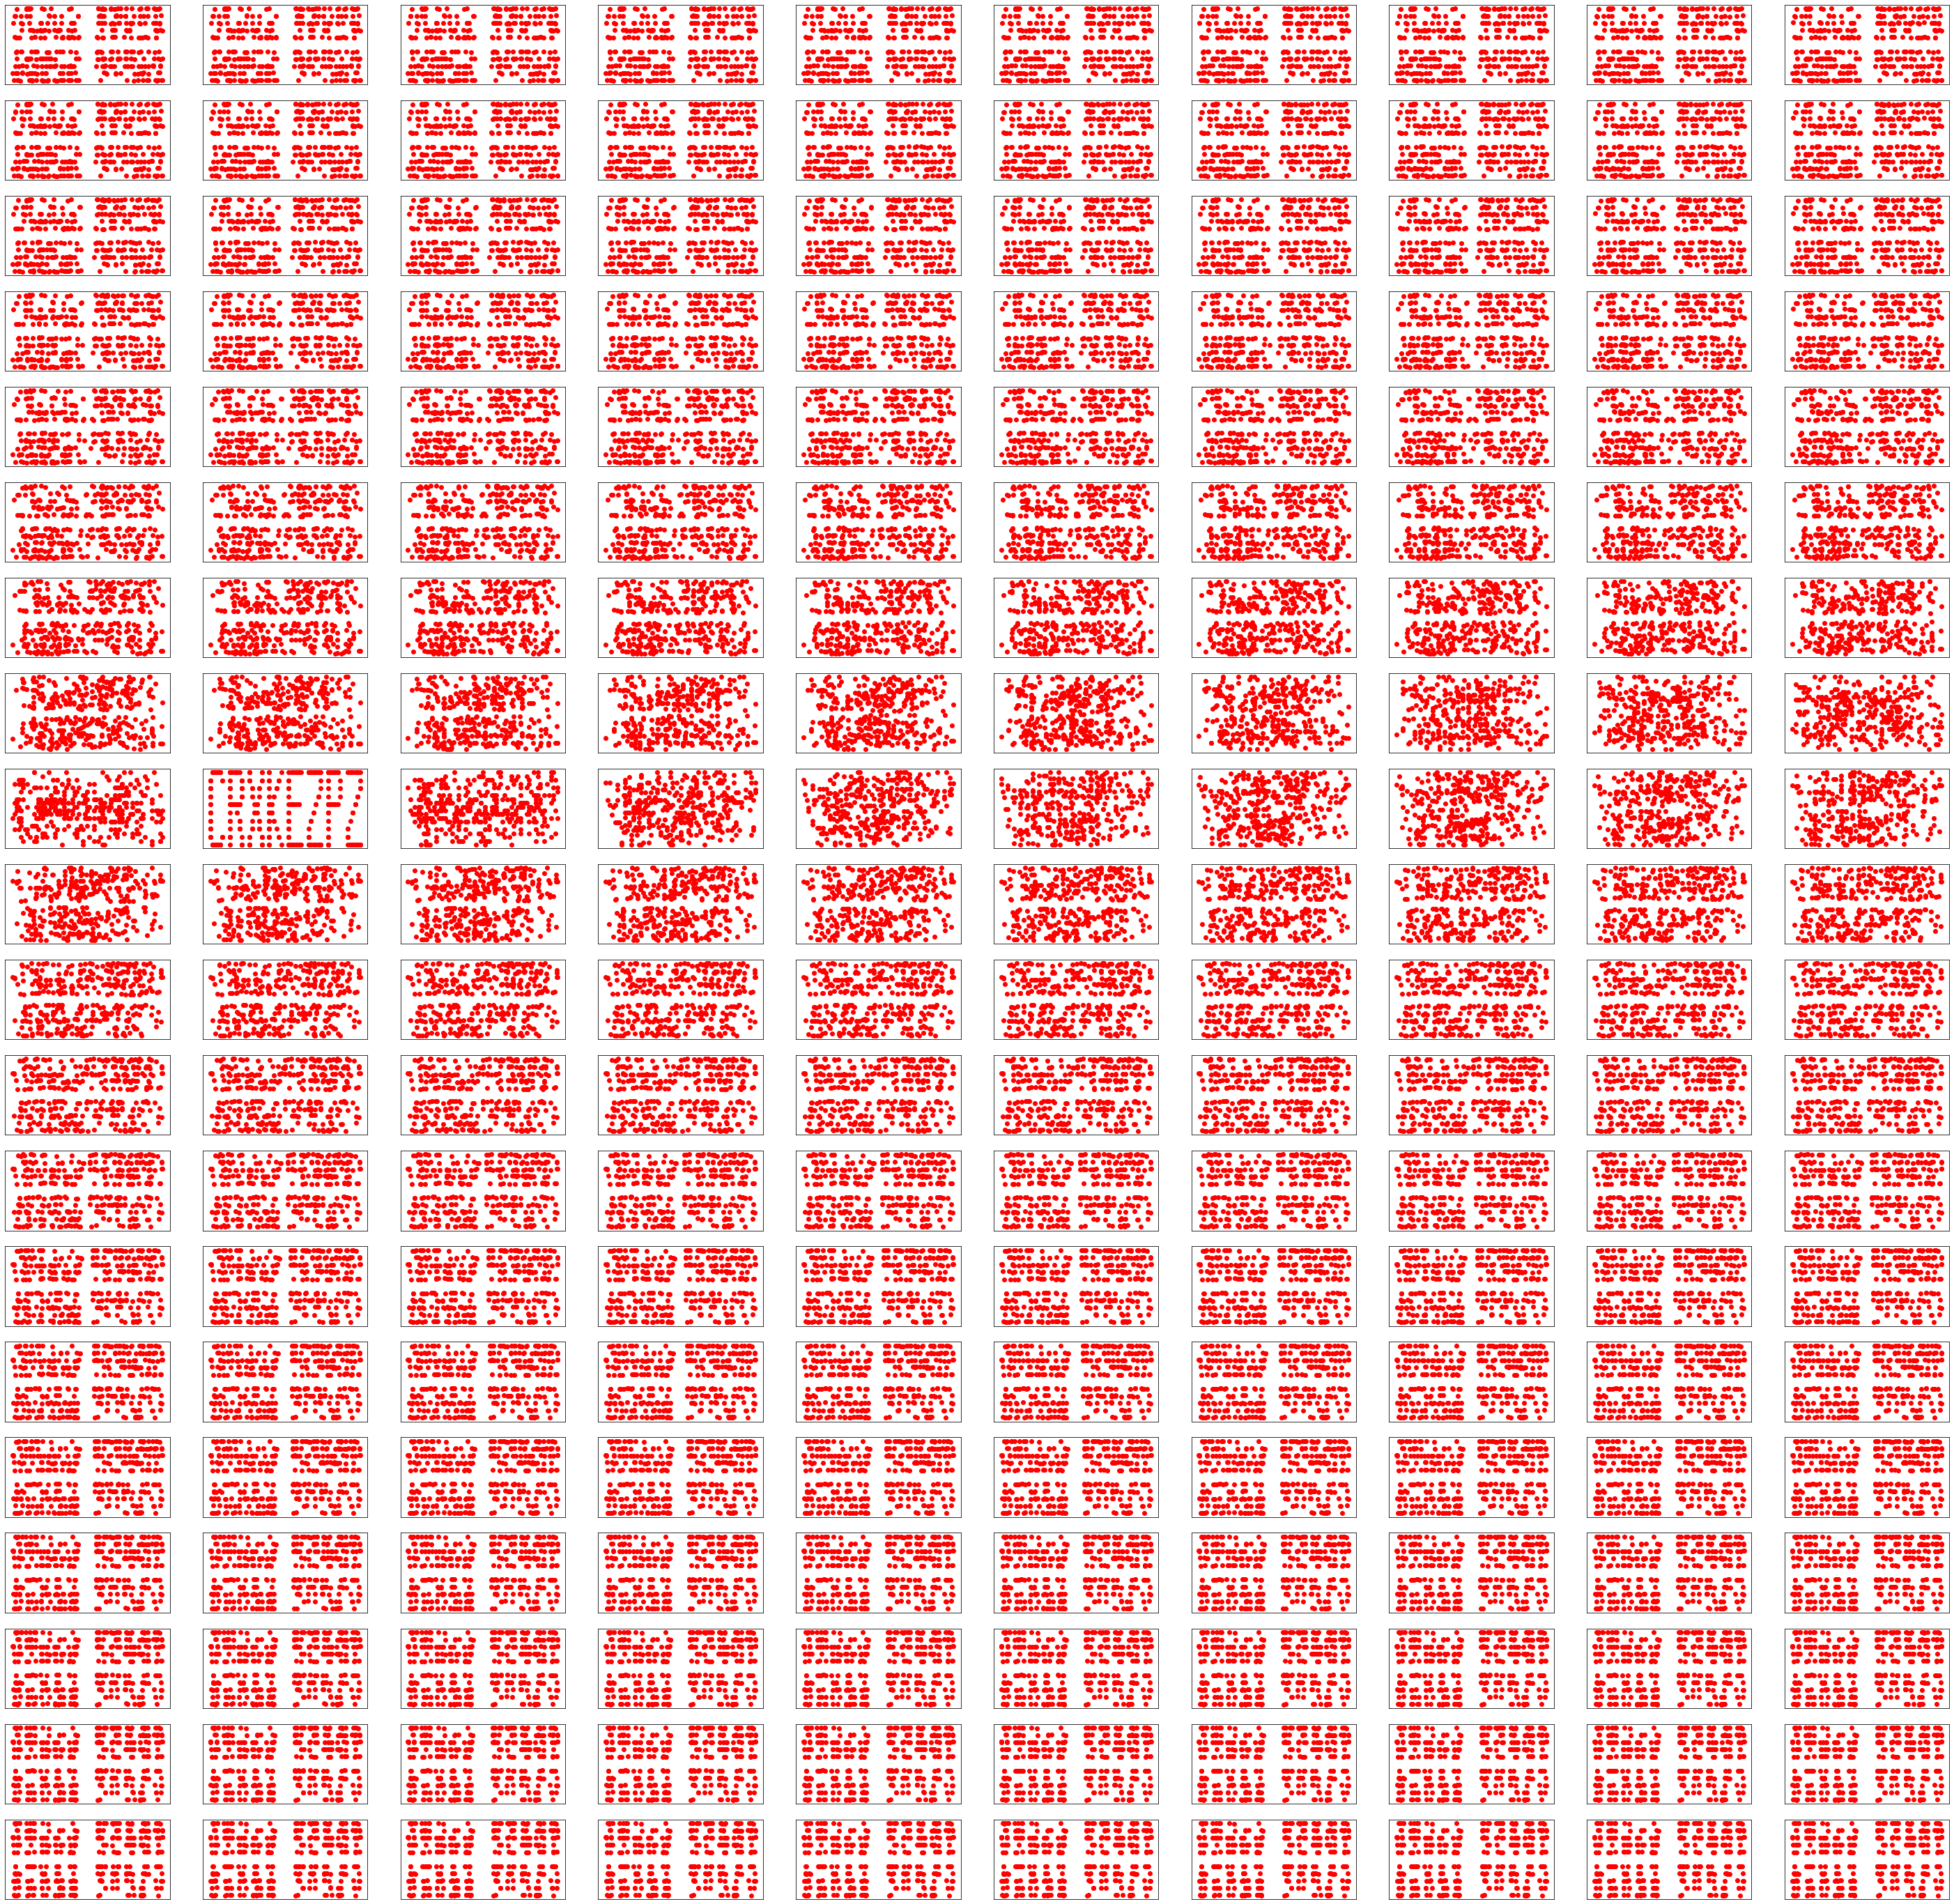

In [20]:
f, axarr = plt.subplots(20,10, figsize=(50,50))
for i in range(2_00):
    subplot = axarr[i // 10, i % 10]
    subplot.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    subplot.scatter(xs[i],ys[i],c='r')

Yeah! Found it!

Part 2

I could have written some code to get it but the answer was obvious from the graph above: 10081 seconds

# 2022 day 21

define constants

In [7]:
INPUT_TEST = """root: pppw + sjmn
dbpl: 5
cczh: sllz + lgvd
zczc: 2
ptdq: humn - dvpt
dvpt: 3
lfqf: 4
humn: 5
ljgn: 2
sjmn: drzm * dbpl
sllz: 4
pppw: cczh / lfqf
lgvd: ljgn * ptdq
drzm: hmdt - zczc
hmdt: 32"""

pat = re.compile(r"([a-z]+):\s((\d+)|([a-z]+)\s(\*|-|/|\+)\s([a-z]+))")

In [18]:
INPUT = '''qzbs: 3
wljg: 12
zgnc: dmcb * wlvd
vrzg: nczp * qfdp
zpvn: twgm + nbbw
jdtl: 5
nrsh: vjtq * zwvv
tpjl: zgpw * mcpf
root: rjmz + nfct
bjnf: czsb / spcv
ngpw: 14
qpvs: 9
tlvh: ztcd * nftj
srtz: mhld * qlhg
bjhm: 19
bfjr: rhzr + tqqh
vgnh: 2
fqsd: hsml * wgrl
bjmm: 4
gdvj: 3
cmzb: 9
vrss: 2
gcnd: nqjd + zlzz
mzrp: 5
blsc: dgss + qngp
pvzf: 6
cfmn: 4
gvqz: 17
wzgd: 2
ljsh: bqgd * jhwd
szgz: thvw + lfsz
wzpp: 3
dhgt: 2
rtlb: 6
ptfc: cgcz + mrrc
ddpj: 5
nvht: 2
bvdf: 3
mqvp: 2
vjcb: 10
rwcp: gmlr - lqvq
pdnz: 3
cpnv: sqgz * sfdr
cdrn: srjj / frzm
lszf: 3
gsvr: mrnv + ddwn
nrwm: wvpv * rllz
fbjd: 2
cdvp: 9
mfsr: rbmc + ngvs
dzhr: ttzb * tpml
tnql: 4
fjhm: 2
mvww: gpqt / mplm
jzfm: frmc * cnbm
lsfr: gcjr + fcqp
nrcb: gvzv * gzvc
jdnb: 17
lvpp: 5
gvts: 13
nhnb: 7
fbgr: 4
zsdm: nrsh + vwmz
lmvh: pdts / wtrb
sjls: rcfs * nvzq
qfvh: 5
qjdg: hfcs * lqgf
djcv: 5
fvlz: 2
bjrw: vdhz * cjgv
lcqw: 2
wtls: 2
pwwf: zppz + vvhp
hmst: 3
ctsd: hdtq - dsww
ldrt: vmfg * zztt
ncph: sgss * sfgv
ndzr: cqvh * gvts
zwzc: zrhs * drls
lnwc: 1
gmhv: tqtw + qpwl
srws: 2
wpzf: zltf + pjww
jrpb: tjns + tpjl
blcq: pjgp * dptw
zlql: 4
hgbc: 5
zwqh: wllj * splp
trdh: pvdc - crqs
hlgm: cfqs + sqcz
gqvl: rvqw + gsqb
vzvc: 2
dtqg: 12
dcst: rgmz * bpsr
gjbn: nrwm * mbqq
nnpt: vjtv * zvjf
zqgt: vdln / blwf
pqsz: 6
gfbw: 1
zpfn: rbmv + zsrn
qrgb: wcbw + fjzb
qmjg: 2
nmmg: 17
jmqf: 2
nltr: fwmw / wmzm
rjhv: bhjc * tpzv
gbzg: trdh * prfb
qwrd: 3
jtvf: sghw + fwfr
clhn: sznm * fwgn
brnc: 2
sssf: 3
njpz: 4
tcjb: 2
fbvz: dshj * rjjc
pzrj: 3
qhqd: zzwf * cghd
vmfg: 3
snmh: gvhv * cfws
bhvd: 2
lvgh: vnzd * dpbl
pmcz: vgnh * hwfh
rshf: tlfd + tghs
hlqt: pjth * svcl
hfjh: 2
sdlh: 10
rcjj: 5
rrws: zfcd * bcrl
sznt: nbcn * dcmj
fgqs: zrml * fvwv
jmtw: wtcw / lbzv
twzv: rtpq + brhz
rrts: fvtj + wbrd
jrcc: 3
bccm: 7
vwht: 2
mwzp: pwpp + vjdv
chmw: ptsn * qhbr
gzlv: 2
cnch: 3
qhzj: 7
mslt: ffgc + tfwq
lfjr: sjrn + vhmn
nznf: 2
mntq: 18
dvvl: 2
pjww: bjfb * cfzl
vnbg: rdzd * lbqr
rwqw: vvdw + scvr
nfld: 9
vnpt: 2
dlml: 2
zsmt: 15
mftl: bpll - rrwn
hhgl: zmrz * wfsg
vbfp: bjht - mprq
lwrg: phjf * swsb
zdqn: 11
dmqh: 3
qddl: qmcl + srhq
ddpw: 3
lbdb: qbjb * rmpt
sqrs: 3
vrfm: 2
ljwh: 3
mvqw: 5
mqhc: 5
mrrd: 3
qrfg: 2
vqmw: 5
twfz: 5
pmlt: wsbc * rlch
nmpv: qsps + cmrn
gsrb: ctrs + mzrp
rggn: 2
jpbc: 3
pmms: 2
blbj: szbl / ltwg
rghn: 10
bbnv: 2
qwtb: 3
cbqz: mbgf + jwrs
gqms: 1
rrqq: gptp + fsdc
jptq: 4
dgwp: 2
ghcz: 10
ggrl: 5
zwjz: hhhs * fbtd
zrbm: 2
qdll: prdt / nsvj
frzm: 2
cgzr: 2
fqdw: 3
cbwv: 3
gvdc: rrzw * sbsd
mzvr: 8
jgqw: 1
hbbr: 5
lrhn: 3
mmlq: 1
nmtm: 2
tcfm: 5
bfjm: vqnz * zcrf
ldnh: 2
qwlc: ptjs / bbrs
zqfq: 2
rmpl: qgwb * rznj
qvgw: dlzw * vbzc
lpct: 2
zvnz: 2
zhhc: 4
gdgl: 10
fnln: 2
fssl: 2
gptp: cpnv * tzcs
gvsw: jpvw * mgcq
srct: zngs + twzv
cvrw: rmpl + qlpg
fzlj: 1
tfvp: 6
cgcs: 20
fqcf: 3
dwvh: whsr * bcqh
wmqr: 2
gldv: rjzq + qjjh
cmrn: 11
wsbc: 5
qctc: 2
qfcr: 5
zqmj: jpjc * nhgm
vlfp: cblm + tssc
ftst: fnhd * ptjj
zhvh: rqdr * vdgf
wnbr: 4
lhvh: 3
zlnl: 3
vzdz: 3
gvnr: 1
wwfg: 1
tntz: gsrb * ftmd
dllm: mqng * jtst
mrpp: fnws + zlbt
wrnj: zqlm + pbjl
rhjg: pwnz - tgrc
fsgj: czgl * bjrw
nlrl: 12
ngsn: 3
frmc: 2
mmpp: 9
dlmd: 5
trsm: 2
wntt: 2
rllz: tdnh * dhwq
clgs: 2
zsvv: 2
zhfn: nwhz / hldm
bjlq: dtlc / pvzf
gwvr: ctvh * rslf
nrww: 16
vlqf: cvcn * vwvp
nhpf: 2
cptf: 7
fpzv: 2
ttnr: 4
vqqg: jdqv + lslb
tghs: jdhv * vjwj
fjdj: qpmg + zhbm
pzlm: 8
mhhl: 2
hlrg: 2
wnjm: 4
jfrr: 3
jljq: 2
sfnf: 4
qrvp: rhqz * jrpb
jrhz: 4
mwls: ngsn * rsrg
tjvp: qzcs * wrmp
qggh: dmqh * ltvs
jdhv: mmsb + ndsj
jdmj: 3
gzvc: ptgh / ssql
rzlw: dnqp + rzpq
pnps: 5
fvbc: swsw * fcvp
rpsn: vdtg / flpl
drrl: 2
mzvj: jnhb + rjsr
qzjb: ftng + btmj
gznz: jrjg + njbj
cqtl: 5
zlrz: 7
pwng: hgwq + jmst
dmgm: 2
ghsh: qssg * bfqz
vtwn: 3
dvms: lhlr + dsrm
qlfp: mwgw * cdvp
ngvs: pcgv * qsnw
ztlf: ffrr * ltgr
cwff: bbpq * hrrs
qzcs: blct * vjzc
lszs: 1
vmmj: qbww + fqvz
jtlr: 2
mflg: 2
wscg: cbnd * mqwl
rhdd: pdtt * rrts
ghnv: bscd - pvpf
vcdh: hlgm - tmpn
dsvh: fqcf * gtwb
tqrh: 1
nhgb: 3
pnff: 3
mtld: 3
qlrz: bwbn * lvpp
mtrp: lhtp / wzgd
trct: 4
qbqw: 2
pbdh: 6
rqbc: 5
chjg: hqlj - dwmr
pjth: 5
cdzb: 2
vqnz: 2
bbtm: frfc * mdtn
mszw: 4
lcdw: 18
smdv: 5
bdsb: tttd + qlrs
gqgp: 2
vgnb: gsdv + fcsw
wqcq: 4
vtlp: 4
lfcq: cfqq / rdjb
tbbf: lcqw * wjfz
fdrj: 2
vrrq: jljb * ndbj
clbn: tncs * tctb
gwcg: cbwv * lvlw
gdds: nnpt - bqvq
prbd: 2
mqng: 9
tbnj: nwvr * fpzv
nwsb: nlqc + hdhb
tvhp: gzgh * vltr
njdf: dbzv / rvls
nnhg: pgtq * tlvh
lccj: 3
zppz: 3
qvjm: ggcg + wpmp
jgqf: rmvd * lnbj
jwdr: fnjs + lwgc
wvfm: wnfl * nnmp
hqzd: 17
lfsz: 20
lgwb: tngd + trlw
pdbh: 2
brbw: zllr / sgng
wdng: 4
ltjc: 7
czdq: 9
mfvq: 2
jvqv: 2
mrwm: nqsg + psnf
zcnm: 2
hvfh: ncft + zlvn
fcbv: 4
jcpw: vcvr * dhgt
zvzh: 5
jhpz: nmtm * rpzb
bmzs: 9
vgnd: vnmq * rcdb
przl: 13
pfdj: vrcw * rzlw
slcw: 4
slrc: rlqz - djcv
ppsv: wmqr * zjsh
twpq: hqdl * bmtc
rcqv: hbvw + qpsv
dzgz: hcvc / lvwj
plpz: 3
rbjm: fqst * vnrq
qvpv: 5
gssd: zcct * nrjs
swpr: 3
vgsm: jpwf * dpsf
msgg: 2
lvmc: vmzt * jjwm
gmlr: 8
tmbs: 3
hhhs: plpz * tchp
mdps: 2
lmqp: 6
prwc: 2
dqqh: 5
mmnm: 2
szbl: jzms * cgzr
dqgd: 3
rtzh: rqjz + tfgb
bscd: ppsv * cdgj
wzhd: mlbn + qlrz
qjhv: 10
qlnb: 2
pjqr: thwh * jblq
lwgc: 4
ttds: jvfr * hgmz
qpjs: jcgp * sjpd
mlpm: 3
qvmf: 2
dhwq: 2
ltsj: 3
qchm: 3
vrrt: rfdq * fzlw
sbrm: pjbq * zlmh
qvcv: bblj + vwzq
cwrs: 5
gbtv: 11
fnjs: 17
pmvp: ndbl + qjdf
vzcb: 10
swwz: gzsl + vplh
csgg: sccr * frwd
tnjc: bsmc * nvrj
qtls: jwsq * zzbp
brms: 11
qpdt: thjc / qzps
fqvz: lnbb / ngjw
dcmj: 3
lwwg: 2
cvjw: 2
wmdv: 4
mcnn: 3
lqjq: 7
wnsj: pcch * sqlq
snqn: 3
prfb: 2
hlqg: wwft * mvrz
cbnd: dslw / pdbh
rnsz: wzzj * bsnf
rjzq: czrg + zdvl
dpbl: 3
nnvf: 5
wgzq: 2
rrzw: 4
cqfb: 4
gzgh: zrlr * zrww
jrjg: llmm * nnqr
vrfz: 4
qlrs: 8
hdpw: bzdn + trhd
qdlz: rrnv / qbnf
mpzw: 2
zztt: 2
jgvd: fncw / qcbt
phjf: 2
jltr: 15
qzgp: 2
rbdm: 8
wjgt: cnpj * jjrp
hmcb: dfcf * swlf
mcpf: 10
shhq: 5
jgdn: 5
smdr: rpsn * cnch
wtzt: 3
stcr: jbtq + cbgp
hmsw: 5
qcbt: 3
mvrz: rbbm / pdtd
frng: 2
zztp: 3
vnrq: lhvh + zgpz
vbhp: dpdd + wlqn
dlbq: 10
qtbp: jfbg * hpdd
qjpj: qpdt - wpdc
grjs: qcfz * nnqn
qcjb: gzch + sftz
hcvg: hwqf * sssf
cfws: 3
gzgg: 3
jpld: qwlc - qvpv
bdwp: 3
fqjn: gmdl + csdm
ctvh: 7
dfqj: hzlp * zvzh
tfnh: 4
dbzv: pgnc * nfsn
pgmh: 2
mthd: 4
qgpl: qjdg + ghsh
drvz: 4
rsrg: wqcq + rgfd
dttf: fwtj - qcbf
rhzr: 1
wstn: qmnf * vtlp
nccr: 1
zqvs: 2
sngh: lgnb * hmhs
mrgf: 5
qbvl: vvwz * vvdm
qtnm: 3
cpgn: 7
qnqf: qddb + pnps
ntcl: 2
pqdv: 2
fbtd: fqbw * gtrj
tvnd: bgnt + vlqf
tdvq: 18
jvbr: 2
jsct: 4
dvzm: 2
smnt: qvmr * hwcm
cgqm: 4
vbtf: 2
sqgz: 13
dvvj: bdsb * vrls
rjbt: wczf * hztb
pvsr: 5
dqst: vgth + mhnd
jttn: mdvg * jgfq
hrnv: 4
ztgv: 3
jngv: 8
flvm: 2
bvnc: fgff * mhbj
chsz: 2
zbtd: 5
ghgm: 2
rqdr: 6
lhvv: rmfh + nnvf
mcgs: qbwm * fngz
jlfz: spzw * dpss
tqlj: zfsl * vgmd
cgjf: 5
qjsf: ddcv * hwwh
lchg: 4
hhrw: vmvg * mnbq
bshf: lgmc + gjpw
twpf: wpgt + fzdz
fngz: sznt / bwjl
fwwq: 2
bgdd: 2
nrcl: 2
sdbd: 1
mhld: mnlp / qzmr
qvjg: whdz * hznl
nlmg: crcq + cnqc
plzs: 19
dncc: cqwc / zpcp
rjmz: srpq * rvdv
dhtj: nfhr + wbfl
whsr: dtpb / rtmv
pqbw: 14
rlqz: hmst * zfdw
dtrh: 3
tpmb: 5
mtzm: mmcp * ffsh
plhd: zcpn + lnwc
zqlm: 3
tnfc: 12
pqcf: 7
dddc: ssdm - qghd
bwjl: rzjr + jlcw
gcnf: rbjm / lmdz
nshq: gfsp + crzs
cwgj: 2
tfpj: 2
bfgf: cggz / hfpf
rzpq: 2
jbjg: 2
jlcw: 5
jqms: 1
ncvd: 2
qpwl: 14
qgwb: 2
qtnj: djfz + gfsn
fjbm: lstq + vcjs
ggct: qpgr + vtbw
czhg: mrfm + wwhs
slwc: 4
njqv: 2
bcrl: 3
pzth: zwfj * jdtl
gpqt: cnpt * czhg
zhdp: cgjc - fvtz
mdmw: 7
fjfv: 8
lfdg: sdwm * htmt
nzqd: zsjp * lzwj
lbvb: wwmb * bqgc
ghtt: 6
frjs: hplr + ldrt
lhsv: 20
vtlh: 2
rvdv: rdwp - dzgz
blhh: 2
ptbs: 2
pjvp: 4
hffj: 2
tqtw: scvp + wnjm
rgbz: 5
gdhz: 12
phgr: mjqs + sjtj
qbfg: wwln * vndj
gwms: 3
jcvw: 2
dfbt: mdwz + pqfc
fftb: ttds + dljp
nfqs: lnvw * rrdb
vlrq: 2
cbtt: 2
dfvb: sbbv - djfd
dtzs: 1
bglm: tbgp * fcvc
lggn: 3
rznj: tscn + tccw
qcjj: jfqd / jvlp
mpts: 4
twnp: 2
hgrp: cgzb + ztlf
rbmv: bspb * pcbd
dwmf: fdfb * svqp
bjfb: jzws + qsbq
rfzm: 2
dptw: 5
tnnl: pvzz * gjfd
fpwv: 2
hgwq: 12
fswr: 2
hncb: 10
lphl: 5
rtbq: jpld * ddpw
jlht: 3
vbzc: grgg + fgdn
mrrc: qvjg * pqtr
mmsb: 5
sqdq: fccc + wmhp
wcqc: qtmn * gfhd
ddht: njqv * rzzs
lsjr: 1
pmbz: fmfh * ljht
cdlt: 3
gbmw: 2
rtvd: 2
jmbq: 4
rhmr: ttrm - trql
svgt: 5
ffgj: 4
qntn: 8
jcdj: 13
qwbj: dcbf / gnrv
hnbn: 3
vpcz: bshf + lfjr
thvg: 4
vzpn: 3
vplh: lfcz * wpfs
ffgc: wzpf * vtdv
dzrn: jbjg + tnfc
zqnb: djcp + hfqs
rbpd: jnzf + thww
hfdf: 2
ncwb: 2
splp: lcgg + lzdr
gtbc: 4
wlqn: 5
wdqm: 8
fdvw: 4
gtfw: 17
gcmr: dddc + nmpw
dwrd: nltr + nphz
bjpg: ldst * chsr
bbrs: 2
psdd: 5
dfjz: 7
grgt: 1
sjtp: 3
nnqr: 4
bnvs: sfds + ndfm
wcjw: rlqw * jmwn
bldf: cccl * pfwd
bmrv: 2
hfpf: 2
bbpq: 9
nvzq: 5
fwmw: bdds - blsc
pbwf: mrwm + rlqv
wbzv: 14
sbnm: twpf * cvdn
dzcm: slcw + ddgj
zvhb: smvb + dzhr
vtzb: 16
mbdv: 1
rftp: 8
wrds: blcq - mvfw
bfqz: hdmn * bgpb
lstq: pglr + wnsj
zrbb: czld * rrws
zjsc: cvrl * rtzh
qlgf: rpcn / mmnm
rwvj: zltd + ldgm
ddzb: flbs - pptn
fdmq: pqqb * swzt
qjjr: ptvc - wsjg
ndzf: vgnn + qgjs
gjcv: gwqp * ztbn
cpgj: 5
zfsb: 16
hfls: 3
ntzb: rdml + hnqb
zfrs: rwth + zzbw
dwjr: tvrs * frlq
fvtz: dddj / fmzs
dcmw: lfdg + fplh
wltl: gldn * dvcb
zfch: 2
wtcw: hspt + qrwj
mnlb: phcg + spps
jtdm: tvjz / wnvv
ttrm: rwqw + sgdt
nwhz: gppg * shjb
zscq: 3
bgqr: 3
vwqs: bwdg + nfld
cfqq: svzb * cwtt
dfgj: 2
qwbz: qbnm * djdl
qgtm: hmcn * vbtf
wtsj: 5
jgzd: dcmw * nmpv
twdn: 3
czhr: 2
bpmv: tmsg * tddw
jjpc: 3
zrmz: vtjr + zpbs
pqvw: cpdz * qfnq
vrpw: bgqr * znlj
lzgt: srjm + fhpc
ddgj: 3
vsnh: sjtp * hmtg
swsb: 4
bpwr: htzt * fsss
fbvg: 8
qjnf: 4
lgmh: 16
fvwv: 2
nclt: 5
bgsc: tpsd * qzgp
pnch: qpnh * tbcm
rvsn: btfb + dndc
sswg: frht * vjbq
zfsc: gvnr + fqbm
pgbm: pqfh + lcdw
frwd: wlsc + snjl
nqtz: 2
dwpj: pgsg - glmq
mfrh: hgmh / qdvs
fjzb: lwbt * zclj
jndb: 11
wswj: zvzw / sqrs
wtrb: 7
fcnt: pqdn * mccp
wmbc: 3
tchm: 12
qlpg: lzdt + twcj
gzgj: dncc + rjbt
qpgr: 9
nqjd: rdjm * cpwr
pmvs: 3
tgnl: 3
ljfq: 3
dvln: 6
rwgg: 2
vdqf: 3
rmmd: fhsg * qdlb
bshc: qmsz / jzqg
hspt: ncwb * trch
jblq: 3
spps: qlgf + lzcr
qvrh: 2
fqbq: 3
cjzv: jlhb * flqd
nvdj: 2
rcdb: bmgt * bltf
nczp: 2
vlbr: 3
nwzw: 17
tddq: dfgs - pwwf
fhhl: 16
vmjf: 2
hgmh: fssl * rrrz
hnvb: vlrq * gwff
tsrb: hdgc / rgbz
cqnf: 3
hnqb: scng + ftst
clpg: 3
rjpq: 3
humn: 1860
mlwf: 5
bjrh: zmcq / pdfq
mvrs: dgcv + bjfv
pfwd: fzrv + gqbt
rqld: sbnm * dcdl
hztb: hclz / wlvn
nfct: rfmc * ndsm
cggz: tzlw * jvqv
dwlm: dzvn * fvlz
cvsl: zhhc * qrdb
zsfq: 3
qmcl: frqt * rthh
pbtg: 5
wmlp: 13
sbsd: 5
wphf: bzql * slrc
slnr: qdlz * glqz
smvb: hpwq * gqmw
mlnt: pglg + sdzt
hvgm: pgvt + bvzb
bbrp: 4
gnsr: whhn / dvvl
gcds: 12
rdlb: 2
dtlc: hcrw * mqhj
dzsg: 5
mlpq: csmt + tqhw
pcbd: wwvw + bbdl
wpfs: 2
gpcd: 5
sznm: 12
wswt: mrfp + rftp
sntr: 7
cfgb: 13
rwth: jdgg * fdvw
hqln: hcsd + srtz
rlqw: dzzw + jdzb
rjjc: 3
zcdc: qqvm * srvm
vjzc: 7
smjc: 5
zgnz: 6
fqbw: 2
gvcg: 3
fcsb: zrcv + bgdd
qzbn: 12
rvcm: 2
fdvj: 5
lcjd: rfrm * pqml
jfjl: rztp + vgqd
szpr: qrvp * jchj
mvjt: 19
tjfh: tztt * shhq
cgjc: zqdb / gzjj
chsr: 3
cgsz: 11
jvlt: 2
jgbq: ngdm * jjpc
cszb: dqgd * twrw
pghq: jbrb * mthd
lvhp: vrfz * jncv
bjnd: vpsm * zscq
tqqg: 3
mgvr: 18
qvpc: 4
dljs: cfzf + nlrl
nbbw: bncf + pzhw
nbhr: 1
zqfl: 1
cszj: hlqg + fqwq
sqnz: fgjg * tbsl
qdjj: 2
sjtm: 4
hqdl: 4
ftlq: 12
fdrn: 7
bjfv: ntrv * tgvd
pcfw: pjvh - dwfg
tvsg: frqw - rggn
hcrw: dsfs * qzns
bnwl: 14
zhsd: vrpr - sswg
hcsd: ssdj * gwms
gvhz: wtwh + qzjq
gtwb: jfrr * hspg
jvfr: 3
cwmq: frfv - mpvf
pvjl: dpgm * qbqw
cvdn: 2
ndhh: bjmw + lfcq
hnpc: wfnp + pfhb
sbmq: 2
mlgb: 4
vgms: jtlr * mlzv
fsdc: grmm * smnt
qzlh: vfsc + wmdv
srzj: hqln + dlml
hbst: vccm + vcdj
tzpq: tvhq - jlht
prcd: lpqj * dwpj
bvfq: 2
tcfn: 5
ndld: 3
dpdd: 2
tzcs: vpfn * jvbr
bnzl: 1
scvp: 15
tvhq: 10
trlz: 3
grld: 19
gvtg: jgbq * fmqz
sgwv: 2
tsfb: 6
spzw: 4
vvwz: 5
lpqj: 4
zddt: jmsm + fbgr
drfv: fsgh * rtcr
cdgj: 3
jzqg: 2
chdc: rvwf + mhvf
ljht: rhcn + gntv
cpdz: bcrr - jbln
lllb: 3
hdrw: vcgd * hqfm
cbjl: tbnw + cqjp
jblc: 2
wwdw: 3
gsqb: 3
thww: 4
wcgl: cssz * bhvd
wbwd: jjgs + rlqf
hznl: gjbg + trsm
grvh: 2
djdl: 5
zmjz: 9
tlmt: 3
mjqs: gslf + mtqf
dqhl: pnch / tbhm
sgfw: jsct * fjbm
dmvw: 6
ptvc: tmsr * gwvd
qhnh: 1
sjrn: rdzq - rgml
czld: pjvp * bgwj
dgcv: zpjf * mpsz
zrrq: 5
rfgt: 3
gtrj: 4
wslc: 2
zdmm: 4
mhtf: 3
mwsv: 3
pnwd: ssqq + cfrd
nbml: 8
dvcb: sbrm - hrqc
tqwf: 2
gnqt: 12
pzhf: 5
bfpp: rvbv * lflg
ttgg: thwn / htph
rdzd: ctwv * twdn
fftm: 3
wdzv: 11
qszj: hlrt + zpqj
zfqs: 4
pscb: 2
pdbf: cnvg / pgmh
lvnl: bgnm + ddzb
lhcc: rfgt * zcvm
zsgq: ntzb + lbrz
dwvf: jbmh * npdb
gqbt: 5
mbgs: rvnw + bldf
vcjs: wbgw * nssh
pswd: 18
bmvs: cggf / tcjb
hlvv: 11
bprd: 2
gqfn: jncz / mflg
zgnr: ppml * vmvc
cdtl: qmfr * vrpt
twgc: sqnf + jddc
vgth: wsnd - vdgg
qddb: 2
mrfp: 15
mwgw: 4
qbrd: 2
mngl: 2
pcmg: 8
bzzj: zmdp * pbbs
zlvt: 13
qmvc: 6
zvzw: pdps - nzvt
zzpb: tvnz - vrzt
gsdv: wcgs + qwbj
gqgg: 2
grqd: vzpd * bhqc
wwhs: sjtm * fhgp
rvwr: 1
chmg: 9
htfv: mjpd + rvwr
qtmn: plpt / gtbc
rvzw: 5
blrc: vtnm + tjvp
qpnj: 3
wbrd: htpv * ttnr
fzdz: 2
gjdc: bsbf * jvwz
wqqc: bjmh * gcmr
qcgs: stpb + sshc
bhjc: wvzj * bbfj
bvlz: vdmj + mnlb
sbgm: ghcz + zwcv
fzns: vrss + qjrr
pdnf: nlbh + vrrq
vgqd: 10
nvrj: mgvr + cgdr
lqmd: 18
tmsr: 2
bhrr: 2
pbzc: dzdm / qhrt
jqmg: zddp + rdnd
tgvd: vcvc + vgfw
zshc: 2
hdgc: zvhb + zvmb
jlng: 16
hclm: 2
pfrh: tbbf / clqj
gzdf: 11
lwsv: 6
lvtw: mvws * sgmb
bwnn: rfhv * bbvq
cqjp: 15
zfdw: nlwc * lpct
smqd: 16
qhsv: lzrp * ddjz
qlhm: jvlt * jdmj
zfsl: 8
mrws: 2
tdbb: tmbs * qzbs
bccg: 2
pgtq: 13
vvcp: 3
vsbl: fmqf + jgpm
gntv: phlj / vcgl
lzwj: 2
frgd: qjgm * gzgj
prrw: tszg * mvpl
qngp: pfdj + wntl
wwln: gnqt + mstq
wbbd: ppqq * gdpz
htdt: 3
clqj: 2
dclr: 3
pptn: jlwt * sqhj
cvhl: wwbh * ptbs
pjdt: tfvp + sbwg
jrmj: 6
hhwj: 2
gnbc: 3
tzhz: qmjg * jstl
qpzq: zcjn / bjzw
jstl: gplj + vlbj
zbln: 3
vgcl: 1
jpwf: 2
pznp: hmcb / wtls
bmtc: gggt + gvrh
cfzf: 8
zfzv: wqqc * fwwq
pvdc: hzcl * dqhl
vdtg: glfd * mpzw
jmsm: 3
bhmg: vdqm * btjp
rvvz: dfjz + drvz
jmwn: 3
thbw: 1
vrmt: snmh - cpph
hwwh: 9
sdzm: gvsw + hqwv
zwcv: 5
zqnr: mvww * hfjh
fshr: 2
jtct: wlrg + gzlv
gvhv: bpfn / cptr
bvfh: 2
njbj: nnrg + tqdq
wnml: bfjm / zwmv
lvlw: ddpj * hclm
gfhd: jnrq + vmwr
twhm: 5
hzcl: 2
ppnc: 12
fwrq: 2
bdlf: hltp + smmd
dqrc: rcqv - sjnp
vvmp: mlhm * fjml
mfpf: 7
qhlg: wcgl + qpvn
mqrr: twgc + fmhh
djfg: 2
nvgh: 3
wwfd: 10
dqng: dlrb + pdnf
ztrv: 3
ghfv: qstl * hrvb
wsdt: bnvs + mwjh
gshf: qcls * zlcn
zdsv: hnfs * mfrh
cghd: 13
ljtp: 3
qbww: 17
jwsq: 3
jbzz: 6
vlbj: jrpv * vzvc
mpvf: sjcf * gzgg
jlgr: lphp * wvwb
wjvn: 2
vwzq: hdlf + rwlg
mfjz: 7
wmdz: 3
fvtj: dtrh * zlrz
sgng: 2
gcsm: psns - lzpw
jvbh: 3
dtpb: fswr * tbtw
hrmz: 2
rvwf: bscm * cqfb
zmpg: qwrd + twhm
gqjw: 5
pshf: qtbp + tgjf
czhc: lrhn * hcng
tnqj: 3
mpmr: 4
hvvq: 3
vdhz: 3
hghd: 3
dqpc: ngqc / vsnf
zbwf: 3
czlf: 6
blwf: 2
wfsg: zbtd * pzbh
scpn: 2
wfnp: ctww - thbw
nrjf: vwtw + nclp
sfmf: 4
sfqg: tzrj * ndhh
jnhb: svvh - qhnh
fwtj: tjfh * cfmn
rfrm: 3
cmhb: 1
hdlf: 4
gnrv: 2
vjjf: 2
mvpl: 3
tqdq: gldv + vrrt
fgdn: pzhf * hnhq
prdt: dgwp * gjtt
jpjc: 2
njds: vbpn + zlql
rlch: 5
dnqt: mqhc + fzlj
lwtp: 4
lthz: 6
tmhs: 1
vcvc: 6
tqhw: 15
wflv: 2
gmhw: gnln + hbgt
ggjt: 2
hdhg: bvjb + bmrv
wbfl: 1
vzqs: 3
mzwb: mpts + thdf
rhcn: crqz - htsn
jvwl: lhqb / grcv
wczf: 2
wmzg: rsjv / mlpm
clvm: 1
wnlz: 5
shpv: 4
cvbq: 9
fphn: 8
gbnl: tdpq * mcrw
hvdr: 9
ssql: 2
nqrg: 4
wtvd: 2
thwn: 12
mbtd: fnln + fvbc
wffm: 5
ddwn: lmlm * gwnj
dzrr: 1
trtf: qpjs + zgjb
spcv: 3
thdf: pgbm + jhjd
mprq: zfpg + zdmm
qqfc: 3
swcv: 19
qfnq: 2
zfhz: 3
glqz: 6
ffvp: bvfh * mtld
tgpj: gcft - nccr
ljhn: 3
cpgd: 2
nfhr: 18
qpsv: vwbf + njdf
gqmw: wtmj + dmsz
flpl: 2
rchb: 3
szht: jfrw * qvpc
dzwh: 19
gtsc: dljc * zgnz
cvtm: tchm + fhhl
sjtb: svpb + vwlb
blct: 2
fzlw: 8
zpjw: 19
fmqf: 4
dfpv: 2
sdbw: hvhr + pqlw
mpsz: 2
zpcp: 2
vmvr: fszl * hdff
bqpb: fpwv * fhmm
gjjt: qwtb + bjrs
rrnv: wgsh + npvg
fjzw: 2
dcgb: 14
zhbm: znvs * ctsd
jwjv: 2
dgbm: bpsf - qddl
cbgp: sftq / shsn
rdrn: znzg * vpjd
rrnb: 7
dfcs: 3
cggf: gdnq * lwjm
ptft: 4
pfvf: mwls + pghq
lrgd: 8
sqtb: lzft + crsl
gsdp: 3
zfsg: bnbv + cgpn
lqgr: cwff - lwrg
bpgc: sjlf * qfcr
bnbv: 4
dhrf: swpr * bgns
dfvf: nqtz + dsvh
brht: 8
bbsf: 4
zlcn: nrlv + zvzn
cgpv: rdwc + grcf
swzt: 3
ljdm: 2
wwzb: jllz * wlzz
vdqm: 2
wpdc: 4
hqwv: jnpn + wjps
jqwn: sntr * dzcm
szlq: czlc + cpdq
rvqw: mcns * gtfw
cgdr: twld + hrnv
jddc: 5
tljz: 8
cjrv: swwz * cfgv
zmdp: 2
qwqm: wwfg + lmqp
sfdr: 5
rmdf: lccj + jndb
mpwm: 3
ltcj: jmbq * zgvf
cwfh: tltf * hwwm
vccm: 3
vrpt: 2
jjsh: 3
cvgv: 2
sjgh: 2
wbzh: 13
whws: pjqr + dnpw
jljm: 4
qcfz: 2
jjgc: zdbs - nvgh
gvzv: 3
ndgb: 2
bmgt: 2
zzbw: 7
tncs: znsn * wvjs
prsn: 6
zrrg: qvmf * nbmb
gbdf: 4
fzvp: whws * jjsh
jrlj: lfgp + bnjb
czsb: pmcz + rztt
wlpf: frhf + hqfj
pzfw: 2
mstm: 2
rvls: 4
npdb: cctq + nrtj
vhzh: gzhc + nzqd
qwmr: 8
gppg: 5
dzzw: nbwh * rzvn
cssz: mcvg * hhwj
dprb: 2
zwnz: qszj / rrjb
bgwj: 4
zhnc: 3
zltd: nbml * bdss
hmtg: 2
lqjc: 9
jdqv: gwcg * bptf
hpth: jgjf * fqmc
lbrz: pshf * gcsm
zgpz: szqw * zrrq
gdpz: 12
dvzs: 2
tltf: 5
jzms: dpfm + zvbl
pvhm: 7
gzjj: tfwn + brht
hcvc: dfvs + mgbb
rmfh: 2
jtst: 7
rfdz: 2
dljc: 2
rdjb: 2
bcgc: gstj + gbdf
tssc: gstb + tbwt
bwdg: 13
bwbn: nhgc - qhsv
shjb: prrw + bfpp
rdwp: srct * nlfv
bqmz: zcdc + zqnr
smvt: brbw * gqgg
tmth: 5
jjff: 6
scpm: 20
hdjh: swvl + hnrv
hpnl: 1
hldm: 5
ntrv: cbjl + szpr
vdhf: 2
vrcq: ctqn * dvzm
cfzl: tnqj + rqbc
bsnf: 4
wjps: mlfg * fbvz
csqm: bqpb / pssb
cwtt: pznp / grrv
hpdd: 4
wcqr: 2
lwlf: hjwz * dbhq
crsl: 8
cnvg: mrws * cpvf
mgqq: 8
jrwt: rshf + tbnj
hrwf: 3
gqjh: cpgj * rrnb
mmvv: 5
lsfl: 3
qbnf: 4
vnzd: 3
cbdt: 7
wgsw: 2
tccw: sdbd + gqjf
cpvl: vhzh * mpqc
czsr: 3
fzbp: 4
mplm: 3
cvrl: 19
mwjh: clbn + ngdv
srjj: dttf * flqs
hzcg: 3
npqh: 5
vvdq: sfjc * hghd
znzg: 2
jhmw: lqpp - sdzm
jdpg: jhwz + rmhl
jnjv: humn - fftb
wvzj: 8
nqzl: stdr * vfcc
phcg: 5
swvl: gqjh - qctc
cspt: wmdz * wtqm
pdtt: dwmf - zdsv
rlwj: 17
pbmv: vgzv * scfc
hsjl: 19
nzvt: tvng * vmjq
fmqz: 4
wtwh: 5
gfnc: 19
mnbq: vqqg + vnrg
vfgv: zfrs - jzfm
grcv: 2
lgnb: 2
jlwt: gznz * mcfn
rvpt: 5
cnpj: 2
bgcf: cmzb + clgs
whdz: 2
cmmt: 19
jppq: 5
vltr: 3
phlj: tsrb - wltl
vgmd: 3
djft: qlsn + vbql
vpsm: 13
zdvl: 8
sbhf: bpsg + rnsz
zcct: 3
hmhs: 5
lhbn: wmbc * ljdm
cpph: dgbm - cjqm
qmfr: 3
zddp: gnlg / zshc
lpjw: gwdg * bwvh
dlrb: vzhz * pzfw
zwjm: 2
hqfq: 6
qssg: hhnm + mqbf
rqqd: gmpw + qpgp
rlhl: 2
mlfg: prwc * vpmq
zfpg: pwcp + gqms
qjjh: 2
tmpn: bjrh - mvjt
ncss: 5
gsqs: rqld + tlvc
jnrq: 1
dbqf: tfnh * fphn
vpfn: smlf + zhpm
wwft: shlc - dpdv
bqgt: 2
vslm: 3
cpfb: 2
vmjq: 3
rmqp: rwvj + qhqd
jltn: chjg / gcjn
pgnc: hpcw * blhh
pqdn: 3
ffsh: 3
zwfh: nwzw * bshc
vrpj: 2
vggt: mvzb * hlrg
tszg: 5
cwbv: 2
hrwb: 2
rtgh: rdrn + czsr
wllj: 3
pgds: dllm + sdlr
lslb: jvwm * zrrg
qzlr: 3
hvgj: trgt * hlpt
fggh: rdlb * wtcj
vpvg: 4
qghd: 3
ndbl: snpr + sdlh
qtns: zgnc - zqfl
bspb: 2
tdgq: sjgh * pshh
rfmc: gsvq * wwnw
chmn: 2
mvqh: clpg * wlrv
dpss: 2
hhjt: 8
qgfd: 12
mcfn: jrmj + clnt
frqw: 15
zwfj: hpnl + vnvt
dqrw: 5
vjcc: lrhm * qlhm
hqfj: wdhz + lddd
hzng: chsz * hcrc
qjhz: 2
srvm: 3
jqtn: 3
qmnf: jgqw + hjqh
cjwv: bvfq * bcrc
rpcn: zgmm * rlwv
bmtn: sbff * zcsm
jhwd: mwvh * ljhn
hcnr: pnwd * fjfv
ftnv: zdrp * cbtt
znsn: 4
tjns: ljfq * plhd
ldpn: 10
jllz: 3
dpfm: pfvf * jwpm
lqpp: qgcv / jnnc
sjfr: 2
wvjs: 2
cdjg: 4
vhvh: rsvv * mfhp
vsnf: 3
bhgd: tvhp + qcgs
twrw: dbpw + jqwn
czql: wljg * bhrr
bbct: cqtl * bhjq
bpll: hsth + bnwl
pwcp: qdbj * zqld
fzrv: 2
szdh: nwsb + rvmg
fffj: 7
bzzv: 9
qdbb: jqtn + vrcq
wgqt: vgrq - zngb
dlvb: cgcs + gsvv
bwvh: 2
stpb: fpbq + tdlh
psqc: gnhm + rwbv
cnbm: 6
rmcv: nwgn + gvhz
nrtj: zqgt * pths
vpzg: 3
dcdl: dqrc + rjhv
rzzs: 4
mmcp: brqw + wbwd
htmt: qpvs - pzrj
wzgh: mngl * bcgc
sslg: jljq * cgjf
nnqn: njds * zwjm
sdwm: cbqz * lgwf
vrcw: 2
hrvb: tdvq - wqdg
zqcm: 3
fhsg: vmjf * tvnd
rzch: 12
wmnm: 5
gslf: rvzw * jppq
cthn: 2
fcqp: rcvm * tzfg
cqvh: sjls * dcsr
frfv: mntq + rvvz
cmdh: mvqw * lvnl
fszd: 19
hnrv: dbqf / lchg
lrhm: 7
pjvh: bvvd * bdlf
frsm: nqrp + scwc
bqjs: sqtb * rhsq
mvzb: hnvb - ldvm
rgml: 2
chnq: cvsl + nmmg
sgmb: 17
csmz: 5
bstj: 3
zcpn: zwjz / dnqt
jqfq: 3
lhqb: zpnw * nmdh
wlft: pwcm * flwj
srhq: wbnh * wvfh
qlhg: 3
fpdl: dhtj * wbpf
jpvw: vjsb + tqvr
bdsc: 4
zgzv: 1
lbft: bfzh * pbff
mhrv: gbfs * mhhl
hjqh: vsnh + vqfc
qvjt: gcss + drrl
bfwh: 3
gcgp: 4
brvc: 19
srrv: jltn + wsdt
zfcd: 2
smts: 2
fnhd: rmdf / zfmz
jbtm: gbtv * jrhl
qgjs: vqdq * gbnl
ffrr: jdhl + hczp
qpmg: zbwf + fbvg
pmnp: 2
jncz: 18
nhgm: gjvs * cstf
bzzr: vtzb + wrds
dnqp: sfnt + csbb
vgfj: 5
ntzc: ncrs * wdnp
hwwm: 2
flwj: 3
cctq: bhqn * lsrp
nnrg: vpcz * lqgt
hddl: 8
hvlb: hsnh + vwjb
nqrp: 9
rfwl: gsvr / jgdn
rvnw: 2
swlf: 5
cfgv: 2
qqjh: 2
gvhj: sslg * vpzg
qsps: 12
tscn: pmvp * nvht
rhsq: 3
hqzr: jcpw + zwvp
pqfh: 9
sjlf: pnff * dqrw
jfqd: cvtm + csgg
zrwj: fmnb + lbvn
svch: 2
wbvs: tsdw + cmmt
snll: 8
rzjr: 1
twcj: zrpz * msdg
mqwl: 3
znlj: 2
nfzs: bjnf + sngb
wlvn: 2
wwpq: 2
lbzg: bjhm - vslc
vcqs: cptf * wcwd
trql: rtml * jlfz
gfzw: dfqj * vlbr
jbrb: 4
cfrg: zsvb * lvgq
btmj: dshd * snll
pqml: 3
bffs: 20
wnfl: 2
mjnj: 11
bvmd: gqzg + zzhd
qjrr: qhzj * rfpr
qmsf: ldrj + tqqg
pdfq: wldf * fssq
bblj: wwpq * cgmt
svcl: 2
pnmc: stmd * mrpp
jpjp: mfqd + sngh
pgpl: qjgl * pzlm
ptjj: 5
lwcp: 4
gnln: vcvg * dfpv
dbhq: 3
ctll: rtbq * vzcb
qjgm: fsgj + sctd
qmsb: rrds + glrr
hdff: 3
tttd: 15
fplh: fszd + ffmj
lgzp: pjcs * sphj
lmzz: sztj * tvfj
tjcr: cgpv * mlrh
bbdl: 1
hvhr: 2
rgfd: 3
hpcw: chmw / rggw
lwwq: 3
zvmb: jnjv * scpm
qvdr: dqpc + rhmr
pgmp: zcnm * sbgm
lnbb: mhrr * qzbn
bjlr: lcjd * qlnb
cdzf: wlsb * gcds
nnsf: mjrr / wtvd
jbln: 5
dfzj: stcr + cvcf
cmln: 2
mlpw: 2
tvfl: 4
thwh: spcj + bbsf
vvdm: 5
lhtp: wslc * tzjg
dwjl: pvgg - plzs
gplj: dcst * zlgj
jgfq: grgt + dvln
dwfg: hvdr * lzgt
cptr: 4
hmds: 11
pshh: 4
brqw: mfqw + gfnc
pghd: zfhz * pqqm
tnqm: lvtt + mzms
swrs: jqhz * wtsj
hhvc: 2
gnmp: 11
cstf: 2
bhqn: 3
gzsd: nqcd * rpwn
httc: 5
dgss: cdrn * msgg
lrhh: qvjm * nljn
rbbm: cjzv + nhfs
zqwv: ddht + jpbc
lzft: cwst * tpmb
gpbv: vslm * zqcm
snjl: nqgn * qtls
nrhp: bjnd * bwcr
wsjg: 1
gltc: 2
ddcv: 9
dhrt: pjdt + czql
rvmc: 2
mjcq: jgqf + rbhf
ftng: thbj + dvms
tgbj: 3
ztnj: fwvv - wwfd
mcvg: 19
jhjd: 4
rlwv: bmtn + bwwc
wlsb: 3
ztcd: 2
rqtd: 1
jlhb: 4
bzql: 3
nssh: 2
wbgw: rbpd + qgfd
gqqf: vncf + dwjl
dfcf: pbdh * prbd
rdnd: bpgc * qrrw
qgcv: szdh + jmtw
cpsc: 19
shmr: 9
pbjl: 4
pjgp: 9
pths: 5
rvmg: mqvp * trtf
wjfz: fwpt + wwzb
pfhb: rdsf * tsvt
shlc: 10
bjqz: 4
ffzd: 5
wmhq: 11
sfnt: 5
mcrg: 3
qrwj: vhvh - bctb
wvwb: 3
zpcw: 9
zgqn: dfcs * wpzf
bvvd: cgsz + rmmd
wpmp: tljz + tqrh
scvr: ttbs + swrs
sshc: gjjt * gsfz
pzhw: 8
zfmz: 2
gzhc: rwcp + qjhv
mgbb: rhjg * bgcf
tbsl: 3
ncft: cvrw + lbzg
qsdc: pbtg + bwfz
vgnj: 2
wwmb: zwqh + htnf
zzmc: 2
qjgl: vvsl * fjzw
fhpc: bbzq * dqst
jvwc: szgh * tdgq
cvjz: wflv + cspt
flbs: pnmc * frgd
mdwz: mvrs * hdwg
tqqh: hffj * frtb
dbnt: 2
rzvn: 6
tmcn: frjs * jblc
zrcv: ltcj / pcmg
glmq: cszj + wmzg
dbpw: fqbq * qwbz
nbmb: 13
wlzz: 4
gjpw: swrm * nznf
bjht: mzvj + zlsw
nlfv: twwf * vfgv
vcdj: 4
psnf: wwgv * bsfh
pfbp: bdsc + smdr
nfwf: wlfq + mlnt
qgwl: 11
vzhz: fmmm * trbt
zlvn: pfbp * bvtp
cpbh: 5
sqnf: 3
lvwj: 7
pdts: tjcr * vfrr
zlzz: sptr + lszs
pvjr: vhll + wvlc
fwvv: cdzf + vqmw
rjjv: sqdq * tvsg
vgcn: 11
lcgg: zwfh * jwzv
nbmd: mjfz + mfsr
jwzv: gfdd * hscg
mlbn: mrgf * vrmt
mhrr: 4
jvjh: tnzn - zwnz
ftmd: tgnn - mcrg
sptr: 15
cvcn: 2
pftw: drst * hsjl
gcjn: 3
vrjs: bhql + vmgg
tjgd: mtrp * sbmq
hmpj: vjjf + zgwm
vmvg: 2
mlhm: 2
tvrs: 2
rsjs: 14
tvnz: nfzs / zcmq
pvgg: tgbj * cclq
djbf: 5
nsvj: 2
gnlv: qwrn + vjcc
lddd: jcvw * cvlv
wtmj: 14
fmmn: 3
qrfc: 7
grnz: zddt + rfzm
bvlp: njvw * cdzb
pqfc: dmfs * lwwq
zndw: 2
gtvz: frvp + nzvm
tfll: flvm * mzzr
hdhb: mfvq * qrfc
btfb: srws * jgvz
nrdz: wvlj - cpgd
gqzg: 3
srcw: vgqv * tfzr
csmt: szht * pscb
rljl: pmms * dtqg
cpdq: 15
hlmp: ldnh + dhrf
pgvt: 19
wrjp: ntwf * ltmp
jgpm: 3
fjvf: 2
pbrh: 5
bjmw: dlqf + plfm
rtpq: nrcb + dwvf
gwff: 20
zmcq: sfpj * jmqf
tqvr: tnql * cmlq
tgnn: wntt * pdcn
vvsl: pgds / vbhp
dfpm: wnlz * ghgm
jdzb: mdbf * sqpv
hzbf: 12
mpqc: cqnf * sqvt
qpnh: wgwc * fbvh
srzd: 2
zgmm: 2
qwnt: bbpg + vgsm
wngr: 3
hcmq: 1
nmpw: hvgm * wffm
zlbt: qdll * mjnj
mnlp: ppjv * lhvv
zgsg: 2
zzwf: qtjb + mcgs
nlwc: 13
bbvq: 2
rpjh: pftw * jpjp
gmlh: mpfr * lqgr
jwmc: 2
pgsv: rlhl + wmpc
bhvn: 5
djfd: 4
bpsg: 2
fmhh: ffgj * snqn
scmw: 7
bpsr: mhrq * fftm
sqlq: wqld + vnjs
cgpn: jjgc * zjtg
stvh: 1
vtnm: qzlr * tqft
nlth: zpfn * tddq
qtjb: lqmd * dpwg
tmhh: 2
fcsw: zbzs - zqnb
fcvp: 3
wvfh: 9
wvpv: 2
rfdq: njpz * hfdf
vmwr: mdps * tmth
dmhj: sjcl + lrhh
crzs: tqlj * tfll
zcjn: shmr * qffz
jwrs: hnbn + crmh
brhz: wscd * cwgj
mvfw: 14
hqfm: lvhp / fzbp
wqtm: nlmg + gqqf
zcvm: fcnt + njlr
wsnd: 16
pbwm: hdhg * tlmt
ddmj: 3
zwmv: 2
bqmp: ngpw + npqh
dddj: jqfq * wdqm
fstr: wcbp + jvwc
wqsj: fjvf * qbvp
mfhp: 2
hlwb: wbzh * svgt
vwvb: mvvn + mtzm
brbv: dwrd * hncb
hlpt: 2
wzpf: 15
cmlq: 2
lnvw: jwmc * zjss
cnrl: 2
hdtq: pgmp + fqdw
grcf: 2
jlbl: 5
dtcn: qrgb + pzth
fhgp: 19
jcmd: qfwv + psqc
zwvv: 3
bcqh: 2
wrml: 14
scjh: 11
gdnq: 2
gnjp: dtzs + zgnr
rlwf: tdbb + vgms
dthm: 1
lbvn: mrjc * brnc
pbbs: jqds + qrfg
bvtp: 2
vwjb: lsfr * zflg
vbql: ndld * qgnl
fmfh: 14
bqlb: 3
zgpw: 4
gwdg: 5
qffz: 2
pdps: hwcp * zzpb
jhwz: lpsg + gqtn
rtmv: 2
sphj: qtnj * jwjv
vfcc: whjp / fffj
gsvv: 8
vjdv: 9
jmst: dmhj / pqsz
tfgb: qgwl * cvts
qwwl: 2
lgmc: 2
ppjv: 5
lwsw: 4
flqd: gdhz + lhwj
stdr: 3
zzbp: 3
ngjw: 3
snpq: rjzb + bnzl
dndc: 5
fqmc: bhgd + vwvb
rgmz: 3
whhn: gqvl + clvm
btjp: 5
dmqb: 2
qpgp: wvzm * wbcq
hjwz: dwqj * chgz
rslf: 2
zpnw: 2
mhrq: 3
pqtr: 3
rdzq: 9
jnbg: 2
ndfm: ctll / mcnn
zzgf: jlbl * tgnl
qnht: 5
hcng: 3
npjl: 2
cwnp: zhsd + cfrg
svpb: gncq * rtlb
mcrw: 7
drst: jqms + gwvr
lhrd: gltc * bffs
ctqn: 4
jcgp: lvqc * hflp
lgwf: 2
rrdb: 3
rmpt: mhtf + rdwz
fjml: brvc + ldpn
trhd: wngr * hvgj
lqgf: 5
vvbw: hmvr + fshr
bpsf: hcqs * lgwb
jjwm: 2
bcrc: tbjz + phgr
tchp: fvzc + gtsc
rchr: 8
cvcf: gdds * zjsc
grrv: 5
tpml: 3
rfjq: wswt + pqbw
bbfj: 8
wbnh: rcjj * smdv
lsrp: jdnb * bfwh
nnmp: prcd + sfqg
gjbg: 9
tbtw: wzgr + rdjz
bjmh: 2
hrqc: 5
hrrs: 5
cnqc: jlsb * nbtt
ndsj: 2
hltp: hmcr * glnl
wprn: fggh + gfbw
rjsr: dtwc * jvbh
pgsg: pwjp / lgcm
wvlc: mzwb * hpth
rvzz: 5
lfcz: nnhw + gtvz
djcp: ccgr * gvcg
qhrt: 2
bmjc: 14
ngdv: dvvj + ljsh
frvp: bvcw * tzzd
jnpn: zmjz * gvhj
plfm: bjmm * fjhm
wffc: lthz * rfdz
hdmg: 5
pqqb: 3
jmdz: 3
czpw: srzd * fglp
nhgc: vzqs * nshq
fssq: 3
gfsn: wstn + hnpc
jncv: dlvb + ncph
nqgn: 2
frfc: 2
sftz: 5
tvvn: 19
qmsz: hhvc * cvjz
gcdj: wvfm - tcbh
lfgp: 8
jnjm: 14
zrhs: sgmf * qsdc
zqdb: rpzc + drfv
sjpd: jwpl / fbjd
bncf: 2
mdvg: swbl / qwwl
ssjq: 9
qpbw: 4
tjrl: 3
gmpw: vgcn + rlwf
zgsc: gnlv * qtnm
mdpv: pvsr * grlh
rbmc: mgqq * gnsr
wzzj: dfgj + rvpt
bttr: 19
jvwz: wmwr + vrpw
nrlv: 6
sftq: gsqs - rrqq
pqqm: 15
ndsm: sqnz * gzdf
dfzz: 5
wtjp: 2
czlc: gnbc * hdmg
qjdf: 6
jbhg: 2
gbfs: jltr - wnbr
fvlw: nhnb * lvmc
svzb: tzpq + zgzv
wlsc: 5
szgh: zqfq * ghdw
wgvh: 3
qsbq: bwrv + qhlg
lwdr: mhzz * zndw
trgm: 6
zjtg: 2
tpsd: 13
mjfz: dmvw * jhmw
bptf: bqmz - vrjs
cfhs: zfjq * mpjd
hbgt: jnbg * dtmm
hwts: ghnv * qssf
chgz: 2
qsnw: gdvj * zfch
lvvb: 3
fmmm: 6
vmtz: 1
fwpt: 17
mhvf: 5
hwqf: 13
lzpw: 4
dpdv: 3
mfqw: 18
crqz: pswd * mbgs
pwjp: mccn + pwng
qcls: 3
nclp: bbtm * nrcl
vwtw: 9
htph: 2
mvqt: bmjt + bmzs
svmc: rghn + dmcl
vwlb: bzzj + nfjp
cvlv: 5
wtnp: 8
rfcq: qjjr * jttn
wwbh: 3
cgtm: 2
crcq: wprt * czdq
nqfb: 3
bbrw: tcfn + jnrc
rcvm: 2
mcns: 2
rcfs: 5
vdgg: 5
tqvn: 2
jdvj: gcrb + wzhd
wqdg: 3
dshj: vbfp / wrlw
rvbv: 2
pcdt: cdlt * bwwl
sgss: 3
rhqc: gnbb * fqsd
lzdr: ghfv + rprs
dppf: 10
rdsf: 11
ncml: 3
trcc: 3
dsfs: 2
zrpz: 5
wmhp: rrwc * btbp
bwrv: wphf + hdrw
wwms: 3
qzmr: 5
rdwz: qntn * hnhv
djfz: rmsg - tphp
pssb: 2
jpvn: 3
mwvh: 2
qjms: 2
jwpl: 14
rttr: 2
drls: 9
trbt: 2
vgzv: 3
jfbg: 4
vfrr: 3
mhzz: qwmb * lfrt
tlfd: qwbw + hrgc
wnwt: 4
gnpt: 17
dmbb: 5
sqpv: mptl + wqtm
nrjs: gshf - grjs
vwmz: 3
vpmq: 3
wmpc: 4
tvfj: nbmc * lwsl
lmvz: rljl * qtns
tvjz: fpdl + bqjs
jchj: wpgl + lrgd
fhlv: dqng * hrwb
wnvv: 5
hcqs: 12
wcbp: zbln * prff
pdtd: 2
pcdb: 1
bdcj: mhjd * dfvb
pvpf: 7
mrjc: 4
rhqz: 2
gdqw: 3
wgsh: fvlw + dprm
hnfs: 4
trpb: cwbv * zfqs
hmcr: wjgt / zfcn
hflp: 6
bmzz: 1
ptjs: cdtl * jgvd
zsvb: 2
rvmz: dzsg * vgfj
ljwj: trgm * qqfc
nljn: 5
zqhd: 9
vmvc: 3
pfzw: 2
tsvt: 2
zrww: 4
pwcm: trlz * frsm
jfrw: 2
dljp: tzhz * cgtm
lwgs: 2
fdfb: 2
wvzm: qbvl - trpb
lmlm: 2
dsrm: cgqm + sfnf
jrpc: dqqh * grvh
fsgh: pjfz - dvqf
stbf: rttr * bhvn
lzdt: 4
flrn: djpb * lllb
bjfc: 3
tvdb: ftnv + bmzz
lvrr: bccm * rwzb
ntjm: nbhr + lphl
wlvd: ncml * qvrh
htnf: sgfw * gmlh
sfgv: hqzr * pjsq
lvpt: 3
jrrw: 2
mdtn: 5
zvrt: gmhw + fzvp
wsff: 16
ngnl: czlf + lsjr
wrlw: 2
wwgv: 14
sbzj: hdbl * qbfg
wrff: 2
lwbt: 4
hczp: 3
grlh: 10
mvpv: 4
bgnt: 7
wntl: ndsr + dqcv
zltf: pphj * pcfw
rggw: 2
jzws: zrwj * wbvs
vjwj: 9
qzns: 3
dpwg: 3
mhnd: 2
qbbl: dwjr * zvnz
cvts: 2
snpr: 1
vcrg: jpvn + wdng
rjzb: 12
pdzn: jwps * tvvn
sdsm: 17
lpsg: 5
vvhp: qqjh * lwcp
ldgm: zqwv * lbmr
jnrc: 3
rtml: 4
hdgh: 2
rlqf: dwvh + lvtw
vffg: 4
ptgh: bbct + sjtb
nmtl: 2
sqhj: bfmj * lqjq
mfqd: wzpp * gqfn
zsrn: 9
jbtq: gjbn / jtct
mpjd: hdqh + jmlv
qbvp: 5
mjrr: qzjb + cppm
qpsc: 13
dgjw: lmwg + wrml
bvzb: 3
gjzw: 4
hdqh: dvzs + jbzz
jnzf: rldh / wrff
qdvs: 2
fvzc: 1
dhmn: bzzv * lwsv
cblm: nfwf + dvlc
sbff: 6
cjvm: 3
twld: 7
tmsg: 2
gzsl: tmcn + rjjv
rsjv: zjvq * wwld
lgcm: 4
dzvn: fgqs + mgwt
ctrs: 2
mzzr: zsmt + vffg
bwwl: 3
hmvr: 5
nnhw: wvdr + wrjp
rfpr: 3
vbpn: 3
ngdm: 3
vfsc: 3
mlrh: 3
pjcs: qchm * zrbm
jcpj: 4
lvgq: cjvm * bfjr
qrrw: 10
wflp: fbvn / nqfb
tgrc: lgzp / dmqb
jgjf: 2
vslz: nvnb - qgdf
vhmn: zzgf + czhc
brwd: 4
hqlj: svzt * tfvr
zcrf: pbzc + hvfh
jvlp: 2
wnff: 3
cpvf: hcnr / jbhg
ldrj: 10
cwst: 7
ssdj: dflc * mrrd
pzbh: 6
bpfw: 6
jnjw: 13
dmsz: zpvn * wgsw
qnpb: lvpt * rzch
bctb: dhrt + qbbl
cqsc: jtdm + fdvj
grmm: 2
dmfs: dfzj * vsbl
hfqs: 8
hwqd: gcnf + dwlm
zjsh: 5
zllr: wzgh * bphf
vrqw: 2
dsww: 4
ttzb: bjfc * gnpt
hprv: vmqd + lvrr
bfmj: jdvj + rhdd
bgpb: 5
hdmn: 9
prff: ztnj - dlbq
gnbb: 3
ggcg: jrlj + tmhs
cfqs: ljwh * hlwb
rdml: slnr - hdjh
vdgf: 2
nhfs: 14
nbmc: bvnc - dcgb
zgwm: hbst + zpjw
jgvz: 7
lqsj: lszf + bjqz
wcwd: dzwh * zzmc
tbjz: zlnl * cdjg
pwpp: 16
sgmf: 2
fmlg: pfrh + ppnz
wgrl: cnlt + ztfq
ldvm: 3
mtqf: 9
hbvw: vvbw * csmz
bphf: 2
vtjr: 3
qwdg: ngnl * cpfb
cccl: 3
pjfz: srrv / wgzq
cfrd: 1
jbll: mvpv * vlsn
vqfc: 2
rdbb: 5
rwlg: 3
trgp: wsff + ztrv
rprs: sbzj + jgzd
jdnt: 10
vcvg: szlq + srnw
hplr: bdcj - vspg
sttt: 2
zngs: pfzw * zgqn
wdnp: hdgh * zqhd
lvtt: dzrn + wdzv
sctd: bpmv - fgqp
fwfr: gbzg / vrpj
vnmq: 14
bfzh: 6
fqst: 2
vcgl: 2
qbnm: 2
rqjz: 7
sghw: thvg * gvqz
qgdf: pbwf + rczc
tljs: 2
sjtj: 13
jvwm: nrjf * tqwf
twgm: 1
bdjt: 5
zvjf: 4
vcgd: 7
qrmr: bzzr * bstj
bwwc: 1
ltgr: 3
dcbf: cqsc + cjnt
mqbf: 5
mbgf: 4
zvzn: vgcl + vwqs
gvrh: 7
vgrq: wtjp * lhsv
bwcr: 5
bwfz: 12
bwdp: 3
blcb: lqsj * zzzt
gfsp: wrnj * nnsf
cgzb: ftlq * lwgs
jhcz: 3
nnvs: ltsj * ptff
sfpc: 2
qbwm: 5
fccc: 1
wlrv: mpwm * wgvh
nlqc: mbtg + zfsb
tphp: 5
ppml: 5
dpsf: 13
htzt: 2
gzch: pdbf / dmgm
pdcn: 5
czgl: 2
lmdz: 2
cpwr: 3
rldh: gqgp * qjpj
svqp: rmqp + zlnd
tzlw: jlhn - mhrv
sccr: 2
mjpd: jdnt * hzcg
jwps: 5
bcrr: hwqd * sjfr
tbgp: 3
rrjb: 2
djpb: tzdn + wwdw
clnt: 5
pjsq: 3
lbmr: gnmp + tljs
zmrz: vzdz * jvdp
bhqc: 2
dcjd: 3
bjrs: 7
rdtg: tvfl * qwdg
hltr: 5
mgwt: 5
cppm: mvqh - wjvn
vbns: jbll / lwtp
mzms: bmjc + svmc
rmhl: 3
tzfg: wtzt * jzsh
lzrp: 13
ptrm: nvdj * qpnj
hdwg: 4
lvsf: smvt + qjsf
wpgl: 11
zlzt: jljm + hfls
pwnz: ndzf / mfpf
dlzw: 2
dtmm: lbft / ntjm
bsmc: 3
btbp: rbdm + rjpq
svzt: 2
hcrc: 17
hdtf: qrmr * lsfl
shff: hdfl * qhsd
dmcb: 7
qvmr: stvh + bwnn
fmzs: 2
gcss: 4
lqgt: 2
srjm: ntzc + zfzv
lzcr: 4
wlfq: bwdp * svlp
nwvr: 4
pcgv: pdzn - thdr
mhbj: vrzg / tlbd
zlnd: vcrg * wnml
rzzl: 2
pphj: 3
nfjp: 19
tbhm: 8
svlp: ffvp + srjf
hsth: wtnp + qcjb
zgvf: swrv * bqgt
qtcg: 5
bvjb: 5
frhf: wmhq + hzbf
vgfw: 1
nphz: ggct * wmlp
zdwz: 4
mqhj: prsn + qcjj
hwfh: brbv - ndzr
glrr: cvbq * gpbv
thbj: 2
cqwc: sfsg + lwdr
zdrp: 7
zhpm: tsfb + mlgb
nhch: zfsc + jlng
gsvq: cmdh / dlmd
gjvs: nnhg - lbvb
glfd: qzlh * zlzt
zrml: 3
sqcz: jrss + tbpq
bdss: nclt * rsnd
lbfz: vqzw * shpv
bzdn: qqfj * cwnp
hqvp: tgpj * fmmn
frqt: hcvg + rtjq
lgqd: wbzv + rfjq
zpqj: twnp * lbfz
wcbw: qmsf * vwht
dmcl: ffzd + rchr
rczc: bgbj + djft
qwrn: vvmp / svch
jqhz: 5
wprt: 4
vslc: 2
tzjg: szjb + nlth
wvrj: 8
fgff: 3
tdlh: 7
vpjd: dfpm + pdnz
zjpc: qfvh * nhpf
qfwv: dhmn * bdwp
nbwh: pvjr / npjl
fhmm: zwzc + jqmg
tbpq: zhvh + mjcq
hcqh: 3
mzgc: wnwt * wvrj
tfvr: zvrt + pmbz
sfpj: wlft + fmlg
crmh: 4
crcw: mslt - cjwv
bpfn: tjgd * cqrw
dcsr: 2
ncrs: 8
wtqm: 5
tddw: mvqt * vdhf
rrds: dljs + srcw
hsnh: rpjh + rfcq
lnbj: 3
vqzw: 5
sdzt: ddmj * sgwv
ndsr: rchw - qvnn
rwbv: hmpj + dzrr
ztbn: gnjp / cvjw
ctww: 8
zcsm: 2
tctb: pcdt - zhnc
bsbf: 4
lwdt: fdmq * rpdt
rfrj: 5
tfzr: 3
wvdr: hddl + dmbb
sfds: tntz + qgpl
llmm: bqmp + qsvt
jzsh: dfzz + rsjs
hpwq: 12
bdds: gcdj / hdwh
fwgn: wffc * zsvv
rwzb: 2
qzqs: 4
pbff: zntn + rdbb
qdbj: 4
wjrf: tnjc + pgpl
zlmh: 2
grgg: 3
nftj: bbnv * dfbt
wjnq: 2
bjtn: 3
rrwn: 10
wrbm: 2
gnhm: 2
mbqq: jtvf * nmtl
zzhd: 14
vnvt: wtwt * hdbw
nwll: 13
sdlr: fdrn * mfpn
hnhv: 2
dfnf: 3
tlbd: 2
rsnd: mpmr * smts
fvrv: 4
dlmm: 3
znvs: 4
crqs: vlfp / hltr
dpgm: 3
gvnt: vzpn * pvhm
qqvm: bvmd + czpw
bqgd: 4
sbwg: 11
pglg: hlvv * dvcc
gggt: 6
csbb: 18
zcmq: rqtd + znvp
zdbs: 12
lqlw: zgsc / lvvb
shsn: 4
qcbf: gvtg - ltjc
hznv: brwd * gcgp
vvdw: 11
wvlj: gjdb + fhlv
pglr: grqd / cthn
htsn: rfwl * dcjd
sngb: zsdm * jfqs
smfh: 3
mfpn: 2
vnjs: 1
gjtt: lggn * hvlb
bqvq: 3
mrfm: hrwv * lvgh
vmgg: bttr * mwsv
hspg: 2
nvnb: pwvw * nbmd
hwcp: 12
tbcm: bprd + rdtg
rpwn: 3
tfwn: 1
qsvt: 10
pqqj: 3
zlsw: cvhl + brms
wcwp: cfhs / pmnp
fbvn: jlgr * rtgh
wdhz: vdqf * qtcg
stmd: 2
ptsn: 2
cjgv: 4
zfjq: 2
zzzt: cpvl - vcqs
wscd: hdtf + lbdb
frlq: zfsg + gcnd
mptl: pgsv * rvzz
vwbf: mzzp * zdqn
jzhb: cwmq * tfpj
tfnp: rhqc + pqvw
sbbv: 12
vncf: 5
lbzv: 3
qwmb: szzz + wrbm
bltf: 7
qstl: qdbb * rlrz
srpq: 3
ccgr: 2
fbvh: 8
srjf: 8
psns: zclh + mzvr
cclq: ljwj + ncss
hdbl: 3
vrls: 2
szqw: 2
jlhn: gfzw * jrcc
wwnw: 2
vqfm: zsfq * qwqm
ltmp: 2
qqfj: 2
glnl: 4
bvcw: 3
njvw: qhjh + cvgv
bhjq: vlvf + hmds
thdr: tmhh * qzqs
rtcr: 3
rpzc: tvdb * gvnt
zpbs: rtvd * twfz
ptff: 3
fqbm: 7
gqtn: grld * dprb
fglp: mbtd * ncvd
wmzm: 4
qdlb: 3
nqsg: zjpz + shff
bqgc: mqrr + gsdp
mhjd: 3
lqvq: 1
gstb: 12
cdpl: nbqp + hwts
tpzv: 2
nsdm: shqb * rchb
hclz: sdsm + pghd
mtgp: 8
wjpw: mstm * hqvp
gmwl: 1
tzzd: ptft * pqdv
zpjf: vgnb * tjrl
ntcm: 19
tgjf: 3
rpdt: 13
dnpw: pmlt + mmlq
hgmz: qvdr - lgqd
trch: dtcn - flrn
hhnm: 2
ppnz: 1
qtch: 4
pjbq: fzns + ghtt
rzgh: pmvs * wcwp
wpgt: jnjw + nqrg
lwjm: bhmg - bqlb
wtwt: 16
dzdm: pjlj + jvjh
spcj: 3
ssqq: spfm * wjnq
tzdn: 5
cjqm: bfgf * smfh
zclh: bdjt + zgsg
srnw: jwjf * scmw
dshd: 3
nbqp: 1
vmqd: bjpg - pcqb
bbpg: wnff * wqnj
jbsn: lwlf / ptrm
fpbq: 14
zsjp: 4
hnhq: 2
zlgj: 3
gsfz: 2
ndbj: 2
vlvf: mszw * mmvv
rtzw: mwzp - bbrw
sjcl: sttt * psdd
jjrp: qwnt * qjms
mdbf: clhn + csqm
znvp: 6
qpvn: wjpw / djfg
vrpr: dlmm * swcv
lvqc: 3
sjcf: 2
tdpq: 3
zffb: 18
wrmp: 2
tnzn: bjlq * zztp
bjlc: 3
gmdl: zggj * qvjt
vdln: wgqt * rvcm
hlrt: 4
vdmj: jzhb / rvmc
hrwv: 3
nzvm: 10
dnsq: trct + cbdt
wcgs: glqn * qnqf
tvng: lqlw + jlzv
ttbs: ggjt + vmgj
sqvt: 17
scfc: 4
fqwq: 10
jwjf: ssjq - vtlh
jrhl: htdt + zdwz
zntn: jbsn * chmn
bnjb: 4
whcd: 2
rdjz: hcmq + pbmv
dflc: 2
qssf: 2
mpfr: qpbw * whcd
jqds: 17
tlvc: fstr * tnnl
ntwf: 12
cjnt: jvwl * smqd
ngqc: zhfn * bvdf
lflg: ndgb * lfjd
svvh: smjc * fvrv
lwsl: 13
wtcj: 5
rplq: 4
dqcv: mftl * frng
vhll: qgtm * lhcc
twwf: wcjw / rwwz
dvqf: rvsn * rmcv
vlhs: 10
jnnc: 4
tsdw: 4
sfsg: lwdt + vmmj
ghdw: 4
mlzv: qtch * czhr
jmlv: ztgv * qpsc
bgns: slwc + hvvq
smlf: vvcp * hrwf
fgjg: 17
gcjr: hqzd * blbj
wldf: 2
wwvw: 10
qzjq: zqvs * nmwz
hdfl: 5
hdbw: 2
dwmr: jrwt + bvlz
bscm: 9
lfjd: 17
ltvs: pbrh * wprn
jvdp: 3
ldst: tcfm + hhjt
vmgj: jfjl + vnbg
cnlt: 6
vgqv: 2
pvzz: 2
jrpv: 10
pqsq: 2
qwbw: 9
jbmh: mdmw + jwdr
mccp: 7
scng: 6
mzzp: 5
pcch: 2
mstq: gdgl + mbdv
vtdv: cwrs * ggrl
sjnp: hbbr * zjpc
zfcn: 2
tfwq: hznv * pbwm
rmvd: 2
lmwg: zlvt + nhch
gstj: 15
njlr: ppnc * gjzw
zflg: 11
qjhn: cjrv / hrmz
scwc: qdjj + bjlr
lfrt: 2
fncw: jjff + sbhf
lbqr: 6
rthh: 2
tqft: 5
dfgs: chdc + dthm
dslw: 14
pqlw: 5
hzlp: 3
jljb: 3
qhbr: cpgn + fqjn
ddbg: dgjw + qnpb
wsrl: 10
vndj: 2
zjpz: 16
zwvp: 5
zggj: qmvc + przl
mrnv: qnht + jhpz
rlrz: 2
tbwt: srzj + qvgw
qhjh: 8
frtb: 3
rsvv: hdpw + gzsd
whjp: trgp * sdbw
gwqp: 2
gjfd: 11
jlsb: 2
cgmt: bccg * lhbn
rlqv: jcpj * zstg
rfhv: 5
zqld: 2
hrgc: wcqr * ntcm
vjtv: 10
pjlj: lmvz + zsgq
ddjz: bvlp - nhgb
dfvs: vbns * fwrq
nmdh: hlqt + gmhv
qlsn: nfqs + zrbb
rztt: rlwj * mlpq
gncq: dclr + gjdc
hmcn: qbrd * blrc
bmjt: 8
thvw: 20
rcdr: 3
mvws: 4
glqn: jrrw + hgbc
wzgr: jrhz * dppf
dtwc: 5
sgdt: lwsw * zffb
cqrw: 2
frht: 4
nqcd: wcqc + wswj
vrzt: crcw - qggh
cgcz: 8
nmwz: 6
trgt: zrmz + lpjw
qbjb: bpwr * vrqw
zbzs: scjh * gqjw
gfdd: 4
rtjq: cpbh * hmsw
jlzv: bgsc + twpq
lhlr: 3
msdg: 3
vcvr: 3
dlqf: fcsb + szgz
vnrg: lmzz + blcb
vzpd: vggt + vvdq
ctwv: 3
jfqs: vcdh / cmln
npvg: wflp / mtgp
tzrj: 2
gcft: 8
gnlg: wjrf * lwwg
mbtg: mfjz * dfnf
swrv: nnvs + gvdc
wbpf: 4
bsfh: 2
fmnb: 1
jwpm: 2
wbcq: 2
vspg: vlhs - jzmj
hqpz: 3
rdwc: 5
ssdm: wqsj * httc
qrdb: hcqh * vnpt
bgnm: qvcv * zqmj
vmzt: 4
bjzw: 2
wqnj: 7
dvcc: 3
qzps: 2
jrss: pvjl * lqjc
fcvc: 4
thjc: vgnj * cdpl
hscg: 2
tztt: 5
nfsn: 2
gqjf: 6
flqs: 2
gjdb: rfrj * grnz
jjgs: wsrl * bpfw
qhsd: 5
nlbh: 5
tbnw: jngv * cfgb
zstg: hzng - mlwf
vtbw: fcbv * jcdj
jdgg: jptq * sfmf
nbtt: ddbg - lgmh
ffmj: 12
vqdq: rwgg * dnsq
zrlr: 4
rdjm: vmtz + vmvr
ltwg: 2
bhql: lmvh * pqcf
vlsn: ptfc + gssd
lphp: 8
pcqb: qjhz * ttgg
swrm: 7
gwnj: chmg + mdpv
ppqq: 4
hlwd: 9
zclj: bbrp * scpn
nbcn: jbtm + zpcw
vjbq: 4
spfm: 3
wlrg: 5
pwvw: 2
bbzq: 3
jdhl: gbmw * wmnm
jzmj: 3
hfcs: 3
sztj: nwll * dbnt
ztfq: 1
qvnn: 17
htpv: 4
fszl: 2
rmsg: rzgh / vtwn
tcbh: rcdr * fjdj
lhwj: 5
pdpv: lvsf + qjhn
qfdp: wscg - vpvg
rpzb: hlmp + zmpg
vgnn: vslz / hqpz
sfjc: ljtp * jhcz
vwvp: 3
qgnl: hqfq + gmwl
dprm: rqqd + chnq
plpt: rzzl * tnqm
zvbl: cpsc * pqqj
wwld: wlpf / mlpw
rwwz: 3
gwvd: 4
hdwh: 5
hwcm: hlwd + dfvf
vjsb: gpcd + wbbd
zjvq: qjnf + nqzl
vjtq: 2
mccn: vjcb * zhdp
smmd: rtzw * vrfm
mvvn: cszb + pdpv
rchw: pqsq * htfv
bgbj: tfnp + jdpg
fnws: jrpc * hhrw
szzz: jmdz * snpq
hsml: 3
fsss: hhgl + nrdz
szjb: nrhp + rvmz
gldn: bjlc * djbf
wqld: gdqw * fdrj
gcrb: cwfh * hprv
dwqj: qlfp + cmhb
shqb: 5
wmwr: 1
tdnh: jnjm / ntcl
dvlc: nsdm * mmpp
wgwc: 2
rztp: wwms + rplq
csdm: 18
swsw: 3
nwgn: sfpc * trcc
czrg: 9
fgqp: bjtn + gjcv
trlw: nrww + lhrd
rrrz: jcmd + vgnd
tngd: qwmr + hgrp
rbhf: bmvs + stbf
zgjb: mzgc + vqfm
swbl: tqvn * qmsb
rrwc: 2
mgcq: 5
zjss: pcdb + bglm
zngb: cnrl + qpzq
cnpt: 3
'''

In [3]:
def make_monkey_dict(input: str, humn_value: int) -> None:
    """Helper function that creates a data structure that will be traversed recursively
        Now the 'root' key gets the equality test as operation
    Args:
        input (str): the input, a multiline string
    """
    op_dict = {
        "+": lambda x, y: x + y,
        "-": lambda x, y: x - y,
        "*": lambda x, y: x * y,
        "/": lambda x, y: x / y,
        "==": lambda x, y: x == y,
    }
    lines = [row for row in input.splitlines() if row.strip()]
    for line in lines:
        monkey_name, *rest = pat.findall(line)[0]
        if monkey_name != "humn":
            monkey_dict[monkey_name] = (
                int(elem)
                if (elem := rest[0]).isdigit()
                else {
                    "left": rest[2],
                    "op": op_dict[rest[3]] if monkey_name != "root" else op_dict["=="],
                    "right": rest[4],
                }
            )
        else:
            monkey_dict[monkey_name] = humn_value

In [9]:
def find_root_value(lookup_val: str = "root") -> int | float:
    """Traverses the `monkey_dict` recursively starting from the 'root' key, until an int value is found

    Args:
        lookup_val (str, optional): the dict key currently looked up. Defaults to "root".

    Returns:
        int | float: whenever a number is found (base case), it's returned, else keep traversing the data structure
    """
    return (
        val
        if isinstance((val := monkey_dict[lookup_val]), (int, float))
        else val["op"](find_root_value(val["left"]), find_root_value(val["right"]))
    )

rjmz=105786316620060.38, nfct=51928434600306.0, humn=-500
rjmz=105786316620044.4, nfct=51928434600306.0, humn=-499
rjmz=105786316620028.45, nfct=51928434600306.0, humn=-498
rjmz=105786316620012.5, nfct=51928434600306.0, humn=-497
rjmz=105786316619996.53, nfct=51928434600306.0, humn=-496
rjmz=105786316619980.55, nfct=51928434600306.0, humn=-495
rjmz=105786316619964.6, nfct=51928434600306.0, humn=-494
rjmz=105786316619948.62, nfct=51928434600306.0, humn=-493
rjmz=105786316619932.66, nfct=51928434600306.0, humn=-492
rjmz=105786316619916.7, nfct=51928434600306.0, humn=-491
rjmz=105786316619900.75, nfct=51928434600306.0, humn=-490
rjmz=105786316619884.78, nfct=51928434600306.0, humn=-489
rjmz=105786316619868.81, nfct=51928434600306.0, humn=-488
rjmz=105786316619852.86, nfct=51928434600306.0, humn=-487
rjmz=105786316619836.88, nfct=51928434600306.0, humn=-486
rjmz=105786316619820.9, nfct=51928434600306.0, humn=-485
rjmz=105786316619804.95, nfct=51928434600306.0, humn=-484
rjmz=10578631661978

rjmz=105786316617649.84, nfct=51928434600306.0, humn=-349
rjmz=105786316617633.89, nfct=51928434600306.0, humn=-348
rjmz=105786316617617.94, nfct=51928434600306.0, humn=-347
rjmz=105786316617601.97, nfct=51928434600306.0, humn=-346
rjmz=105786316617586.0, nfct=51928434600306.0, humn=-345
rjmz=105786316617570.05, nfct=51928434600306.0, humn=-344
rjmz=105786316617554.06, nfct=51928434600306.0, humn=-343
rjmz=105786316617538.1, nfct=51928434600306.0, humn=-342
rjmz=105786316617522.14, nfct=51928434600306.0, humn=-341
rjmz=105786316617506.19, nfct=51928434600306.0, humn=-340
rjmz=105786316617490.22, nfct=51928434600306.0, humn=-339
rjmz=105786316617474.25, nfct=51928434600306.0, humn=-338
rjmz=105786316617458.3, nfct=51928434600306.0, humn=-337
rjmz=105786316617442.34, nfct=51928434600306.0, humn=-336
rjmz=105786316617426.34, nfct=51928434600306.0, humn=-335
rjmz=105786316617410.39, nfct=51928434600306.0, humn=-334
rjmz=105786316617394.44, nfct=51928434600306.0, humn=-333
rjmz=105786316617

rjmz=105786316615175.48, nfct=51928434600306.0, humn=-194
rjmz=105786316615159.53, nfct=51928434600306.0, humn=-193
rjmz=105786316615143.56, nfct=51928434600306.0, humn=-192
rjmz=105786316615127.58, nfct=51928434600306.0, humn=-191
rjmz=105786316615111.62, nfct=51928434600306.0, humn=-190
rjmz=105786316615095.66, nfct=51928434600306.0, humn=-189
rjmz=105786316615079.69, nfct=51928434600306.0, humn=-188
rjmz=105786316615063.73, nfct=51928434600306.0, humn=-187
rjmz=105786316615047.78, nfct=51928434600306.0, humn=-186
rjmz=105786316615031.81, nfct=51928434600306.0, humn=-185
rjmz=105786316615015.84, nfct=51928434600306.0, humn=-184
rjmz=105786316614999.88, nfct=51928434600306.0, humn=-183
rjmz=105786316614983.9, nfct=51928434600306.0, humn=-182
rjmz=105786316614967.94, nfct=51928434600306.0, humn=-181
rjmz=105786316614951.98, nfct=51928434600306.0, humn=-180
rjmz=105786316614936.03, nfct=51928434600306.0, humn=-179
rjmz=105786316614920.06, nfct=51928434600306.0, humn=-178
rjmz=1057863166

rjmz=105786316612844.77, nfct=51928434600306.0, humn=-48
rjmz=105786316612828.81, nfct=51928434600306.0, humn=-47
rjmz=105786316612812.84, nfct=51928434600306.0, humn=-46
rjmz=105786316612796.88, nfct=51928434600306.0, humn=-45
rjmz=105786316612780.92, nfct=51928434600306.0, humn=-44
rjmz=105786316612764.97, nfct=51928434600306.0, humn=-43
rjmz=105786316612749.0, nfct=51928434600306.0, humn=-42
rjmz=105786316612733.03, nfct=51928434600306.0, humn=-41
rjmz=105786316612717.06, nfct=51928434600306.0, humn=-40
rjmz=105786316612701.1, nfct=51928434600306.0, humn=-39
rjmz=105786316612685.12, nfct=51928434600306.0, humn=-38
rjmz=105786316612669.17, nfct=51928434600306.0, humn=-37
rjmz=105786316612653.22, nfct=51928434600306.0, humn=-36
rjmz=105786316612637.25, nfct=51928434600306.0, humn=-35
rjmz=105786316612621.28, nfct=51928434600306.0, humn=-34
rjmz=105786316612605.33, nfct=51928434600306.0, humn=-33
rjmz=105786316612589.38, nfct=51928434600306.0, humn=-32
rjmz=105786316612573.38, nfct=519

rjmz=105786316610114.97, nfct=51928434600306.0, humn=123
rjmz=105786316610099.02, nfct=51928434600306.0, humn=124
rjmz=105786316610083.06, nfct=51928434600306.0, humn=125
rjmz=105786316610067.1, nfct=51928434600306.0, humn=126
rjmz=105786316610051.12, nfct=51928434600306.0, humn=127
rjmz=105786316610035.17, nfct=51928434600306.0, humn=128
rjmz=105786316610019.19, nfct=51928434600306.0, humn=129
rjmz=105786316610003.22, nfct=51928434600306.0, humn=130
rjmz=105786316609987.27, nfct=51928434600306.0, humn=131
rjmz=105786316609971.31, nfct=51928434600306.0, humn=132
rjmz=105786316609955.34, nfct=51928434600306.0, humn=133
rjmz=105786316609939.38, nfct=51928434600306.0, humn=134
rjmz=105786316609923.42, nfct=51928434600306.0, humn=135
rjmz=105786316609907.47, nfct=51928434600306.0, humn=136
rjmz=105786316609891.47, nfct=51928434600306.0, humn=137
rjmz=105786316609875.52, nfct=51928434600306.0, humn=138
rjmz=105786316609859.56, nfct=51928434600306.0, humn=139
rjmz=105786316609843.6, nfct=519

rjmz=105786316607768.31, nfct=51928434600306.0, humn=270
rjmz=105786316607752.36, nfct=51928434600306.0, humn=271
rjmz=105786316607736.38, nfct=51928434600306.0, humn=272
rjmz=105786316607720.4, nfct=51928434600306.0, humn=273
rjmz=105786316607704.45, nfct=51928434600306.0, humn=274
rjmz=105786316607688.5, nfct=51928434600306.0, humn=275
rjmz=105786316607672.53, nfct=51928434600306.0, humn=276
rjmz=105786316607656.56, nfct=51928434600306.0, humn=277
rjmz=105786316607640.61, nfct=51928434600306.0, humn=278
rjmz=105786316607624.66, nfct=51928434600306.0, humn=279
rjmz=105786316607608.66, nfct=51928434600306.0, humn=280
rjmz=105786316607592.7, nfct=51928434600306.0, humn=281
rjmz=105786316607576.75, nfct=51928434600306.0, humn=282
rjmz=105786316607560.78, nfct=51928434600306.0, humn=283
rjmz=105786316607544.81, nfct=51928434600306.0, humn=284
rjmz=105786316607528.86, nfct=51928434600306.0, humn=285
rjmz=105786316607512.9, nfct=51928434600306.0, humn=286
rjmz=105786316607496.94, nfct=51928

rjmz=105786316605198.16, nfct=51928434600306.0, humn=431
rjmz=105786316605182.19, nfct=51928434600306.0, humn=432
rjmz=105786316605166.22, nfct=51928434600306.0, humn=433
rjmz=105786316605150.25, nfct=51928434600306.0, humn=434
rjmz=105786316605134.3, nfct=51928434600306.0, humn=435
rjmz=105786316605118.34, nfct=51928434600306.0, humn=436
rjmz=105786316605102.38, nfct=51928434600306.0, humn=437
rjmz=105786316605086.4, nfct=51928434600306.0, humn=438
rjmz=105786316605070.45, nfct=51928434600306.0, humn=439
rjmz=105786316605054.5, nfct=51928434600306.0, humn=440
rjmz=105786316605038.5, nfct=51928434600306.0, humn=441
rjmz=105786316605022.55, nfct=51928434600306.0, humn=442
rjmz=105786316605006.6, nfct=51928434600306.0, humn=443
rjmz=105786316604990.62, nfct=51928434600306.0, humn=444
rjmz=105786316604974.66, nfct=51928434600306.0, humn=445
rjmz=105786316604958.7, nfct=51928434600306.0, humn=446
rjmz=105786316604942.75, nfct=51928434600306.0, humn=447
rjmz=105786316604926.78, nfct=5192843

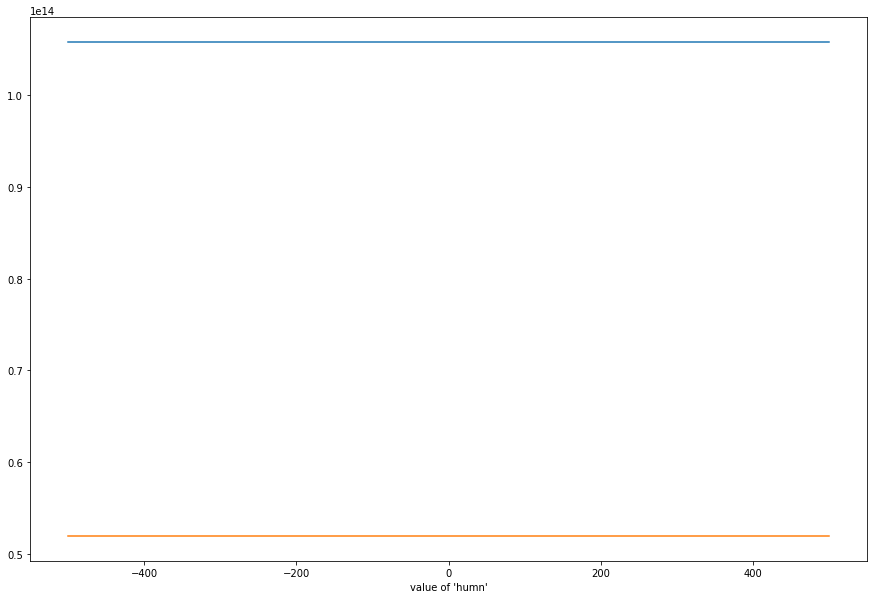

In [32]:
humn1, humn2 = [], []
for humn in range(-500, 501):
    make_monkey_dict(INPUT, humn)
    rjmz = find_root_value(lookup_val='rjmz')
    humn1.append(rjmz)
    nfct = find_root_value(lookup_val='nfct')
    humn2.append(nfct)
    print(f'{rjmz=}, {nfct=}, {humn=}')
    
plt.figure(figsize=(15, 10))
plt.plot(range(-500, 501), humn1)
plt.plot(range(-500, 501), humn2)
plt.xlabel("value of 'humn'");

In [29]:
set(humn2)

{51928434600306.0}

I can see that `nfct` is fixed and is equal to 51928434600306

Now I need to understand how `rjmz` moves when `humn` moves, in order to make `rjmz` equal to the above value of `nfct`

In [31]:
humn_values =  []
for humn in range(10_000, 12_000):
    make_monkey_dict(INPUT, humn)
    rjmz = find_root_value(lookup_val='rjmz')
    humn_values.append(rjmz)
    if len(humn_values) > 1:
        print(humn_values[-1] - humn_values[-2])

-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.9

-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.9

-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.984375
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-16.0
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.96875
-15.96875
-15.96875
-15.953125
-15.953125
-15.96875
-15.96875
-15.953125
-15.984375
-15.96875
-15.953125
-1

so it's clear that when `humn` increases by 1, `rjmz` decreases by close to 16

when humn = 0 we have : rjmz=105786316612078.53, nfct=51928434600306.0, humn=0

In [35]:
(105786316612078 - 51928434600306)//16

3366117625735

In [52]:
min(humn_values, key=lambda x : x-51928434600306)

51927640681977.83

In [56]:
humn_values

[51929508437079.875,
 51929506567455.16,
 51929504697830.42,
 51929502828205.7,
 51929500958580.97,
 51929499088956.26,
 51929497219331.516,
 51929495349706.805,
 51929493480082.08,
 51929491610457.34,
 51929489740832.61,
 51929487871207.89,
 51929486001583.16,
 51929484131958.445,
 51929482262333.695,
 51929480392708.984,
 51929478523084.24,
 51929476653459.53,
 51929474783834.8,
 51929472914210.08,
 51929471044585.336,
 51929469174960.63,
 51929467305335.88,
 51929465435711.16,
 51929463566086.44,
 51929461696461.72,
 51929459826836.984,
 51929457957212.266,
 51929456087587.53,
 51929454217962.81,
 51929452348338.08,
 51929450478713.36,
 51929448609088.625,
 51929446739463.91,
 51929444869839.164,
 51929443000214.44,
 51929441130589.71,
 51929439260964.984,
 51929437391340.25,
 51929435521715.516,
 51929433652090.805,
 51929431782466.08,
 51929429912841.35,
 51929428043216.61,
 51929426173591.9,
 51929424303967.16,
 51929422434342.45,
 51929420564717.734,
 51929418695092.99,
 5192941

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 161.66it/s]


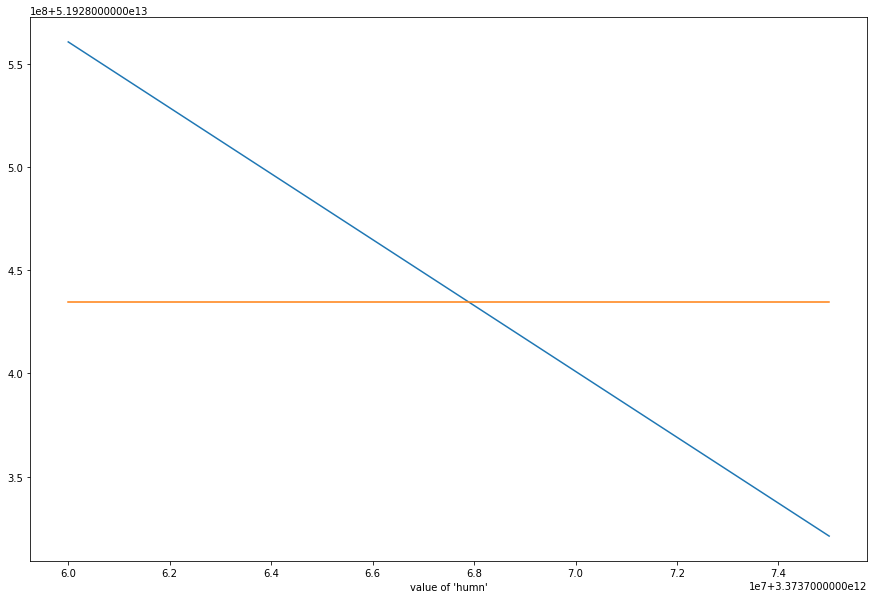

In [59]:
humn_values =  []
tailored_range = np.linspace(3.373*10**12+7.6*10**8, 3.373*10**12+7.75*10**8, num = 1_000)
nfct = [51928434600306] * len(tailored_range)
for humn in tqdm(tailored_range):
    make_monkey_dict(INPUT, humn)
    rjmz = find_root_value(lookup_val='rjmz')
    humn_values.append(rjmz)
    if int(rjmz) == 51928434600306:
        print(f'{rjmz=}')
        break
        
plt.figure(figsize=(15, 10))
plt.plot(tailored_range, humn_values)
plt.plot(tailored_range, nfct)
plt.xlabel("value of 'humn'");

Looks like I need to implement a binary search

In [66]:
current_humn = 3.373*10**12+7.6*10**8
make_monkey_dict(INPUT, current_humn)
rjmz = find_root_value(lookup_val='rjmz')
nfct = 51_928_434_600_306 # doesn't depend on 'humn', it's fixed 
step = 1_000_000 # somewhat arbitrary

while abs(rjmz-nfct):
    while rjmz > nfct:
        current_humn += step
        make_monkey_dict(INPUT, current_humn)
        rjmz = find_root_value(lookup_val='rjmz')
    step /= 10 # somewhat arbitrary
    while rjmz < nfct:
        current_humn -= step
        make_monkey_dict(INPUT, current_humn)
        rjmz = find_root_value(lookup_val='rjmz')
        
print(f'{rjmz=}, {nfct=}, {current_humn=}, {rjmz - nfct =}')

rjmz=51928434600306.0, nfct=51928434600306, current_humn=3373767893067.0, rjmz - nfct =0.0


# 2022 day 24, exploration

 I'll reuse my code from `2022/day24_exploration.py` to plot the path taken

In [2]:
"""A grid problem, involving blizzard moving. My solution uses a priority queue and the A*
algorithm. To make it faster I could encode the states as binary numbers instead of as lists of integers.
An important part of the solutoin is that the blizzard motion being deterministic, I can cache all possible
blizzard maps beforehand, which I did in a dict of dicts of position:[blizzard direction]"""
import cProfile  # before caching already explored (time, position) states I needed to profile my code
import logging
from collections import deque  # for the BFS
from queue import PriorityQueue  # for A*

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

INPUT_TEST = """
#.######
#>>.<^<#
#.<..<<#
#>v.><>#
#<^v^^>#
######.#"""

INPUT = """
#.########################################################################################################################
#>v^<>^^>.v<v^<>><>^v<>^.<v><>^<>^><><>v><^v>>><.<<<<^v.^<><^v>>^v^>v>.<^<^>^^^>^v>v><.v<v^>v<<.^^.<>vv<<.<>^^>vv^<<v>^v>#
#<<<v^>.><v^>.>^vv<<^^<><<<^^<v^<^<>^^.v..^<v^><^v.^<>vv<<.<<v>v^^v^^<v.<<^^>vv<>vvv^>^>.<<.vv<>^^><v>>v^^^<<^.^<>^.v><v<#
#>^v.>v<^^>^>v<<<<><>>vv<<>>v^>.<^v.>^>^^vv^<<v<^^vv><<v^<^v<^>>^.^v^^v^<<<^v>^<>^^^v.^>>>^^>>^<<.<<<<.><<><^.<.v.^v><vv<#
#<>>vvv^^v><<<vv.><.<>>><^<v.>v>v^v^>^^<>v><^>><v>^v<>>>v>^<<vvv^<v<^^<<v^>.^..<v<<<v>><vvvv<>.<^^.v^^<<<>><><>.vv><^>vv<#
#<v<v<vv>>><v<><<^>.><><v^^v>>vv><><v<v^v^<^^.>>>^>.^<<v^>>><^.<^<.><<vv^>^<vv>>^<>^v<^v^v^<>v<<^<.<><vv<.<v>^>v<^<v<^.v<#
#.^<v^>^v.^^><.vvv^^^>v<^v>.><v^>.>^^<^<^vv<<.<v<^<v^<<><<^vv^<<v<.>^.<<^v<>.<^<vv.>>v>>^v^>vvv<v<>v><>^^^v^>>.^vv<<.^v^>#
#.>^v^<>v<>>><<<^<^<v^<>.>^>v>v^^v<>^^v<>^<v^^^v.v^vvv^v<<v>v<>^^vv^v>><<.^>>v^^>^v>^v<<>.<^v<<^<<<.<<v^v<^v.v><>><<v<v<<#
#<><<<<><.^>v<^>><>^.>^^v^v^vvv><.v^<v<^vv^><<<^<>..>^^.v>^^^>>^>>><>vv>^.<<^^^^.vv>v.>v>v>>^v<<>><<v<<^>>^>^.<<v.>^v^<^<#
#<v^.^<><.^^>^<<<>^><>>^vv>>v.<^^..^^.v.><><>v<v<^<><>v^>>v>v<><v<v<<.>v^..^<>.>>>v>v^<><<v^v^>^>><<v^vvv>><.<>>^v.^.vvv>#
#>^.^v>.v^v<v>^v<>^v<<<^v^<<<><><>>.v^v>>^.v.v>><<<v>.>^>.><vv^vvv<vv>>>.<v^^>^vv..^v^.v>v>.>.<vv>>>><^^^>.^v>^<vv.v><<><#
#<^^<>>.<vv>.<^v^v^><^v>><vvv^^^<>>^v^>v^<.><v>^^v>^<.v><^<vv<^>>^^><v>^>v<>^<<><>><>v.^>vv^^<v.v>.>v>v<.>v><<<<.^^<<^^.>#
#<<>>^vv><<<<v<>^<^<^v.>v^<^.>>v^><><v.>>v^v<<<^vv^v><^v<^^>v<^v.>><v^^vv^>vv>^v^<.<>^>>vv><<v^vvv<v<v.v^<<^>^>>>vv<^^^><#
#<^><^>^^<<v^^>.>v^^><v<v<^vvv^>v><^v.^<^^<<v<^>v>^^v<.>^.vv<^v.>>v^.<^^>v>^>^^<^v^>..><>vv.v>>>vv.vv>>v<<<<^>>>v<^>v>>^<#
#.^>vv^vv<>v<<v.^^<.>><v><^v>^.^v><vv<<<^><v.<v<v<.>>>v^v<>>>>^v>^<<v<^<>v.vv.^vv^v><^^>vv><^v^v<<>>v<^v<v>.v^v<vv.^vvv^<#
#<v>>><>v>>v>>^vv<..^>.^>^^<v<><>><^<^><v<^<>^<<<^<..<v^v>^>^>>vvv><><^^>.>v<.^.^>v<<>v.><^.<>.<>^^v<>^^>^.>v.v>^>.v<^<v<#
#<v^vv>>v.><<>^^^v<>.>vv>^.v.^^^^^>^><^^.>><<>.<.<>^><<v>^^.vv.v><>>.v>vvv<v^<><>>vvv^.<<>><><>v>v>>>.^v>>v^v^><>>>>v<v.>#
#>^<vvvv^^v>v>^v^>.<v.v^v<>.v>^v.^.<<^>^<v^^.v.^.v<v>>^<<vv><>v^>vv^<^<>^v<v.v<v^>^^><v^^^^<>>v<^vv^^^<>><<>>.>>>^v<>^>v<#
#>^v>>><<vv.><v>><><^<.<v<^v<^<^^>vv^^^<^>v<v<v^>v<.<^..<.>.><^<<<>v>>.<>.>v.vv<<^^v^v>.v><>>^^>^<^^.^.^>^v.><v>>v<v>vv^<#
#>>^<^vv<>^^^><v<v><>.^><v^>>>><<<>>^>^.<.^^<^.^.^>>>^^<^>>v.v<<v^><^^<^^>vv<><>v>>><^vv.><.<>><vv<^>>>^<^>^vvvvv.vv^v.>>#
#<<v.^>v^<>><v^<>.vv^v^><>><v>><<<>><^^v^<^.<<><^<<vv<.>^>v><^v>v^v><^<>v^^<v>v>v^<^>v>^.<v^><<v<v.v<><^^v><<.>v><v<v<<>>#
#>v^<><<^>v^.^^.v^>>v>^v<<<<>vv^v.>^v.>>^vvv^><<v><^<>v.v<vv>^<..>>^^>^v>^>^^<^<v^<vv^<vvv.v<>><>^<^^>^<^^<.^vvv.^.<<<<^<#
#>.v<vv<v^^<v^^<<.^^v><>^>>>^.v^>^<>^.<<><<^v>^><vv<<>>^v<>v>>.^>>^>.vv<>^<><.<vv<v^..v.><v>^^.vv^.^^<v>><vv>^v>.^>^v><v>#
#<v^<>^^^^<<^^>v.><>^>v.>>^^<>v<><.^.v..>>^v^v>^^>.^v>><v>.^v^<v<><v>v>v<v.v><<<>v>.<>>^<^vv>^v>>vv>^v>vv><<>^^<^<^vv>.^>#
#<^<<><>vv<^^v.^<<^.v<v<v^.>^>^^vv^^v^>^^vv>^>^v^^.vvvv<vv>^>^v^><.>^>><v^v<<.v.v<>v><>^.^^<>>v>v.^<<.<v.>.vvv><<<<v..><.#
#<<<>^^^>^^.v.^><<vv.><><v>>v<>^^v<>^v.<^^^^^<v>>>v>^v>vv^^>^.v>>^^^.><v<v^vvvvvv^^.<>v>>>>v>>^^v<^.>>v.>v><v.v.vv^^^v>^<#
########################################################################################################################.#
"""


class BlizzardProblem:
    "Simulates the blizzard motion"

    def __init__(self, input_) -> None:
        self.input_ = input_
        self.process_input()
        self.start_square = min(loc for loc, val in self.grid.items() if not val)
        self.end_square = max(loc for loc, val in self.grid.items() if not val)
        logging.info(
            f"Start square is {self.start_square}, end square is {self.end_square}"
        )
        self.get_blizzard_states()
        self.get_dist_to_target()  # heuristic (taxicab distance) used to speed up the queue

    def process_input(self) -> None:
        rows = [row for row in self.input_.splitlines() if row.strip()]
        self.nb_rows, self.nb_cols = len(rows), len(rows[0])
        self.grid = {}
        for ind, row in enumerate(rows):
            for col_nb in range(self.nb_cols):
                self.grid[(ind, col_nb)] = [val] if (val := row[col_nb]) != "." else []
        logging.info("Processed the grid")

    def get_blizzard_states(self) -> None:
        """Blizzard states will eventually repeat, so instead of
        always recomputing them, let's store the possible states"""
        i = 0
        self.blizzard_states = {i: self.grid}
        temp = self.grid
        while True:
            new_grid = {loc: [] if val != ["#"] else val for loc, val in temp.items()}
            for loc, contents in temp.items():
                if contents in (["#"], []):
                    continue
                for arrow in contents:
                    x, y = loc
                    if arrow == "<":
                        neigh = (x, self.nb_cols - 2 if y - 1 == 0 else y - 1)
                    elif arrow == ">":
                        neigh = (x, 1 if y + 1 == self.nb_cols - 1 else y + 1)
                    elif arrow == "^":
                        neigh = (
                            self.nb_rows - 2
                            if x - 1 == 0 and y != self.start_square[1]
                            else x - 1,
                            y,
                        )
                    else:
                        neigh = (
                            1
                            if x + 1 == self.nb_rows - 1 and y != self.end_square[1]
                            else x + 1,
                            y,
                        )
                    new_grid[neigh].append(arrow)
            if new_grid in self.blizzard_states.values():
                break
            i += 1
            self.blizzard_states[i] = new_grid
            temp = new_grid
        self.nb_blizzard_states = i + 1
        logging.info(f"There are {self.nb_blizzard_states} blizzard states")

    def get_dist_to_target(self):
        self.dist_to_target = {
            loc: abs(loc[0] - self.end_square[0]) + abs(loc[1] - self.end_square[1])
            for loc in self.grid
        }

    def traverse_pqueue(self) -> int:
        """BFS is too slow, so let us the taxicab disatnce as heuristic and
        speed up the search by popping out the states closest where the expedition is
        closest to the destination square"""
        queue: PriorityQueue[int, tuple[int], int, int] = PriorityQueue()
        queue.put(
            (0, self.start_square, 0, 0)
        )  # distance to target (heuristic), current location, current nb of minutes, current blizzard state index
        seen = (
            set()
        )  # store position (x, y coordinates) and time (index of blizzard positions)
        while not queue.empty():
            _, curr_pos, nb_minutes, blizzard_ind = queue.get()
            if (curr_pos, blizzard_ind) in seen:
                continue
            if curr_pos == self.end_square:
                logging.info(f"Part 1: {nb_minutes}")
                break
            seen.add((curr_pos, blizzard_ind))
            # append legal neighbour states to the queue
            x, y = curr_pos
            new_blizzard_ind = (blizzard_ind + 1) % self.nb_blizzard_states
            for neigh in ((x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1), (x, y)):
                if self.blizzard_states[new_blizzard_ind].get(neigh) == []:
                    queue.put(
                        (
                            self.dist_to_target[neigh] + nb_minutes,
                            neigh,
                            nb_minutes + 1,
                            new_blizzard_ind,
                        )
                    )
        else:
            raise Exception("Unreachable")
        return nb_minutes

    def print_grid(self) -> None:
        "Used for debugging"
        printed_grid = [["#" for _ in range(self.nb_cols)] for _ in range(self.nb_rows)]
        for (x, y), arrows in self.grid.items():
            printed_grid[x][y] = (
                arrows[0] if len(arrows) == 1 else ("." if not arrows else len(arrows))
            )
        for row in printed_grid:
            print(*row)
        print("\n")


# part 2
# now we need to reach the goal, then the start, then the goal again and report the min time taken


class PartTwoBlizzardProblem(BlizzardProblem):
    """Subclass my previous implementation to make a slight change on the path search algo,
    enabling it to go, go back, and go again"""

    def traverse_pqueue(
        self, start: tuple[int], dest: tuple[int], blizzard_ind: int = 0
    ) -> tuple[int]:  # yes, Pylint will complain (W0221)
        queue: PriorityQueue[int, tuple[int], int, int] = PriorityQueue()
        queue.put(
            (0, start, 0, blizzard_ind)
        )  # distance to target (heuristic), current location, current nb of minutes, current blizzard state index
        seen = (
            set()
        )  # store position (x, y coordinates) and time (index of blizzard positions)
        while not queue.empty():
            _, curr_pos, nb_minutes, blizzard_ind = queue.get()
            if (
                curr_pos,
                blizzard_ind,
            ) in seen:  # initially I did not have this check as I thought that just because I've been there before
                # doesn't mean I should discard this state, as I should also take into account the blizzard map state. I still think that's true,
                # but fortunately it still yields the right result this way and is way faster
                continue
            if curr_pos == dest:
                break
            seen.add((curr_pos, blizzard_ind))
            # append legal neighbour states to the queue
            x, y = curr_pos
            new_blizzard_ind = (blizzard_ind + 1) % self.nb_blizzard_states
            for neigh in ((x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1), (x, y)):
                if self.blizzard_states[new_blizzard_ind].get(neigh) == []:
                    queue.put(
                        (
                            self.dist_to_target[neigh] + nb_minutes,
                            neigh,
                            nb_minutes + 1,
                            new_blizzard_ind,
                        )
                    )
        else:
            raise Exception("Unreachable")
        return nb_minutes, blizzard_ind

In [48]:
"""Challenge 24 of AoC 2022 was so interesting that I decided to answer a few
more questions, such as visualizing the path(s) taken. I will code the plotting
here to benefit from the IDE's features but then will copy the code into the 
notebook `puzzles_requiring_graphs.ipynb` in the root dir, in order to view the 
graph in a nicer interface"""
import logging
from queue import PriorityQueue

import matplotlib.pyplot as plt

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)


class BlizzardFullPath(PartTwoBlizzardProblem):
    "Extends the parent class in order to retain the path taken and to plot it"

    def traverse_pqueue(
        self,
        start: tuple[int],
        dest: tuple[int],
        blizzard_ind: int = 0,
    ) -> tuple[int]:
        """Finds the shortest path with A*

        Args:
            start (tuple[int]): starting location
            dest (tuple[int]): final destination
            blizzard_ind (int, optional): the state of the blizzard map, that has been precomputed during __init__(). Defaults to 0.

        Raises:
            Exception: if the destination is unreachable

        Returns:
            tuple[int]: minimum_ number of minutes to reach the destination, and the blizzard state index at the end of the path
        """
        queue: PriorityQueue[int, tuple[int], int, int] = PriorityQueue()
        INFINITY = float("inf")
        queue.put(
            (0, start, 0, blizzard_ind, None)
        )  # distance to target (heuristic), current location, current nb of minutes, current blizzard state index, comes_from
        seen = (
            {}
        )  # will be used to 1) avoid repeating paths 2) reconstruct the shortest path and plot it
        comes_from = self.start_square
        while not queue.empty():
            _, curr_pos, nb_minutes, blizzard_ind, comes_from = queue.get()
            if seen.get((curr_pos, blizzard_ind), (INFINITY,))[0] <= nb_minutes:
                continue  # prune the tree
            seen[(curr_pos, blizzard_ind)] = (nb_minutes, comes_from)
            if curr_pos == dest:
                logging.info(f"{nb_minutes=} taken to reach {dest}")
                break
            # append legal neighbour states to the queue
            x, y = curr_pos
            new_blizzard_ind = (blizzard_ind + 1) % self.nb_blizzard_states
            for neigh in ((x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1), (x, y)):
                if self.blizzard_states[new_blizzard_ind].get(neigh) == []:
                    queue.put(
                        (
                            self.dist_to_target[neigh] + nb_minutes,
                            neigh,
                            nb_minutes + 1,
                            new_blizzard_ind,
                            curr_pos
                        )
                    )
        else:
            raise Exception("Unreachable")
#         self.seen = {
#             key[0]: val for key, val in seen.items()
#         }  # get rid of the blizzard state index
        self.seen = seen
        self.best_time = nb_minutes
        return nb_minutes, blizzard_ind
    
    def go_go_back_and_go_again(self):
        """See part 2: performs the shortest path search three times, in order to go, come back, and go again"""
        self.shortest_paths = []
        nb_minutes, blizzard_ind = self.traverse_pqueue(actual_p2.start_square, actual_p2.end_square)
        self.shortest_paths.append((self.seen, nb_minutes))
        nb_minutes, blizzard_ind = self.traverse_pqueue(actual_p2.end_square, actual_p2.start_square, blizzard_ind)
        self.shortest_paths.append((self.seen, nb_minutes))
        nb_minutes, blizzard_ind = self.traverse_pqueue(actual_p2.start_square, actual_p2.end_square, blizzard_ind)
        self.shortest_paths.append((self.seen, nb_minutes))
        return self
        
    def _reconstruct_shortest_paths(self) -> None:
        if not hasattr(self, "seen"):
            logging.info(
                "No path has been found yet, please run `traverse_pqueue()` first"
            )
        else:
            paths = []
            for trip_nb in range(3):
                path = []
                seen , nb_m = self.shortest_paths[trip_nb]
                latest = self.end_square if trip_nb % 2 == 0 else self.start_square
                start = self.end_square if trip_nb % 2 else self.start_square
                while latest != start:
                    path.append(latest)
                    latest = next(val for elem, val in seen.items() if elem[0] == latest and val[0] <= nb_m)[1]
                    nb_m -= 1
                    # seen[(curr_pos, blizzard_ind)] = (nb_minutes, comes_from)
                paths.append(path[::-1])
        self.paths = paths

    def plot_shortest_paths(self) -> None:
        """Plots on a same graph the 3 paths taken during part 2"""
        if not hasattr(self, "seen"):
            print("No path has been found yet, please run `traverse_pqueue()` first")
            return
        #if not hasattr(self, "shortest_path"):
        self._reconstruct_shortest_paths()
        plt.figure(figsize=(15, 4))
        plt.gca().invert_yaxis()
        #plt.scatter(*list(zip(*self.shortest_path))[::-1])
        plt.title('Paths used (waiting times not shown)')
        for i in range(3):
            plt.plot(*list(zip(*self.paths[i]))[::-1], label=f'Path #{i+1}')
        fontdict = {'family': 'serif',
            'color':  'blue',
            'size': 12,
            }
        plt.text(self.start_square[1]+ 2 , self.start_square[0] + 1 , 'Start', fontdict=fontdict)
        plt.text(self.end_square[1] -2, self.end_square[0] +1 , 'End', fontdict=fontdict)
        plt.legend()

2023-03-28 10:03:03,192 - INFO - Processed the grid
2023-03-28 10:03:03,196 - INFO - Start square is (0, 1), end square is (26, 120)
2023-03-28 10:03:05,862 - INFO - There are 600 blizzard states
2023-03-28 10:03:06,986 - INFO - nb_minutes=266 taken to reach (26, 120)
2023-03-28 10:03:18,756 - INFO - nb_minutes=301 taken to reach (0, 1)
2023-03-28 10:03:20,696 - INFO - nb_minutes=286 taken to reach (26, 120)


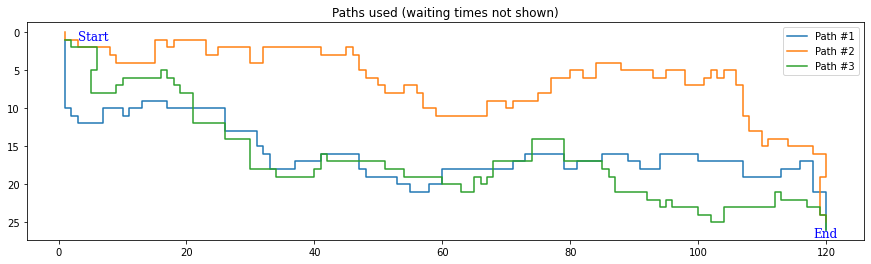

In [49]:
actual_p2 = BlizzardFullPath(INPUT)
actual_p2.go_go_back_and_go_again()
actual_p2.plot_shortest_paths()